# $$ BANK-LOAN-CASE-STUDY $$

## Below are contents of the Project :

1. Description
2. Importing Python Packages
3. Describing Dataset
4. Data Preprocessing 
5. Required Analysis

## Description :
This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers.

**Your Task :**  You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.
***
`NOTE :` Entire analysis is done using Python Packages and MS Excel

## Importing Python Packages/Libraries : 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print('Packages imported successfully')

Packages imported successfully


In [2]:
#import, open and view the dataset
data = pd.read_csv(r"C:\Users\sarfaraaz\OneDrive\Desktop\Trainity\Bank Loan Case Study\application_data.csv")
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Describing,Preprocessing and Cleaning of Dataset :

In [3]:
# understand the structure(dimension) of dataset i.e: size,row,columns
print(data.size) #prints the size of dataset
row,col = data.shape #assigns the row and column to variable row,col
print("Total Rows are : ",row)
print("Total Columns are :",col)

37516342
Total Rows are :  307511
Total Columns are : 122


In [4]:
# describe the columns of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


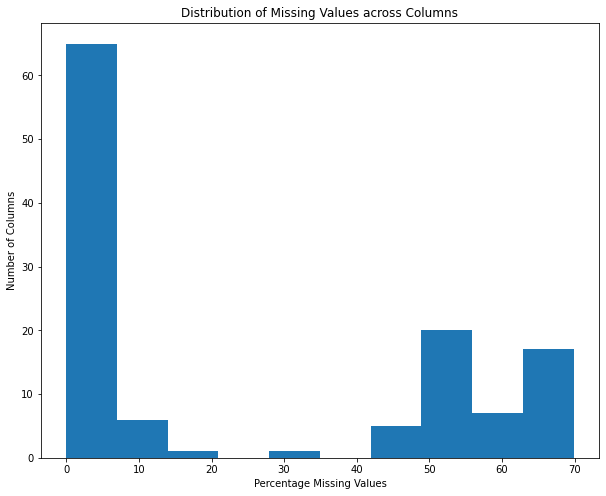

In [5]:
#identifying Missing Values 
app_data_mis_vals = round(data.isnull().sum()/row*100,2)
#plot the missing values in across all the columns
plt.figure(figsize=[10,8])
app_data_mis_vals.plot.hist().set(xlabel='Percentage Missing Values',ylabel='Number of Columns',title='Distribution of Missing Values across Columns')
plt.show()

`NOTE :` From the above graph it is evident that there are many columns with the missing values percentage more than 40%, since 40% is a significant number for missing values in the dataset, we can drop these columns.

In [6]:
#Dropping Columns with Missing Values
#List of columns with missing values percentage greater than 40
drop_cols = app_data_mis_vals[app_data_mis_vals>40].index.tolist()

print('Number of Columns that have missing values percentage greater than 40%:', len(drop_cols))


Number of Columns that have missing values percentage greater than 40%: 49


In [7]:
#Dropping above columns
data.drop(labels=drop_cols,axis=1,inplace=True)

#Verifying the shape of the dataframe 
print('New Shape of Dataframe: ',data.shape)

New Shape of Dataframe:  (307511, 73)


In [8]:
#Now again describe the dataset and observe the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [9]:
#collect all the columns with impute/improper data
impute_cols = data.isnull().sum()/row*100
impute_cols_list = impute_cols[impute_cols>0].index.tolist()
print('List of Columns where we need to impute missing values appropriately:\n\n',impute_cols_list)

List of Columns where we need to impute missing values appropriately:

 ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [10]:
#observe all the rows with null values
null_data = data[data.isnull().any(axis=1)]
null_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307501,456245,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Creating a function to fill missing values appropriately
def fill_null(col_name,df,how):
    df[col_name].fillna(how,inplace=True)
    print('Missing Values have been Immputed for',col_name)
#Let's take OCCUPATION_TYPE, EXT_SOURCE_2 and EXT_SOURCE_3 columns for number of null values
data[['OCCUPATION_TYPE','EXT_SOURCE_2','EXT_SOURCE_3']].isnull().sum()

OCCUPATION_TYPE    96391
EXT_SOURCE_2         660
EXT_SOURCE_3       60965
dtype: int64

In [12]:
data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [13]:
data['EXT_SOURCE_2'].value_counts(normalize = True)

0.285898    0.002350
0.262258    0.001359
0.265256    0.001118
0.159679    0.001049
0.265312    0.000997
              ...   
0.004725    0.000003
0.257313    0.000003
0.282030    0.000003
0.181540    0.000003
0.267834    0.000003
Name: EXT_SOURCE_2, Length: 119831, dtype: float64

In [14]:
data['EXT_SOURCE_3'].value_counts(normalize = True)

0.746300    0.005922
0.713631    0.005334
0.694093    0.005176
0.670652    0.004831
0.652897    0.004681
              ...   
0.021492    0.000004
0.019468    0.000004
0.023062    0.000004
0.014556    0.000004
0.043227    0.000004
Name: EXT_SOURCE_3, Length: 814, dtype: float64

In [15]:
#Lets Also look at CNT_FAM_MEMBERS column, number of missing values
data['CNT_FAM_MEMBERS'].isnull().sum()

2

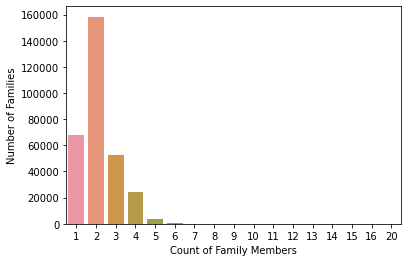

In [16]:
#Lets look at CNT_FAM_MEMBERS column, 
df = data['CNT_FAM_MEMBERS'].value_counts().to_frame(name='Number of Families')
df['Count of Family Members']= df.index.astype('Int64')
df.reset_index(drop=True, inplace=True)
sns.barplot(data=df, x='Count of Family Members', y='Number of Families')
plt.show()

***
`Note :`It can be seen most of the families has 2 family members, hence it is safe to impute missing values with Mode of CNT_FAM_MEMBERS column
***

In [17]:
#EXT_SOURCE_3,EXT_SOURCE_2 are normalized scores from data source 3 and 2, we can impute missing values with average value
fill_null('EXT_SOURCE_3',data,data.EXT_SOURCE_3.mean)
fill_null('EXT_SOURCE_2',data,data.EXT_SOURCE_2.mean)
#OCCUPATION_TYPE column has unordered categorical values, we can impute missing values with a value 'Unavailable'
fill_null('OCCUPATION_TYPE',data,'Unavailable')
#CNT_FAM_MEMBERS can be imputed with the mode
fill_null('CNT_FAM_MEMBERS',data,data.CNT_FAM_MEMBERS.mode)

Missing Values have been Immputed for EXT_SOURCE_3
Missing Values have been Immputed for EXT_SOURCE_2
Missing Values have been Immputed for OCCUPATION_TYPE
Missing Values have been Immputed for CNT_FAM_MEMBERS


In [18]:
#Let's verify Null Values for OCCUPATION_TYPE, EXT_SOURCE_2 and EXT_SOURCE_3 columns 
data[['OCCUPATION_TYPE','EXT_SOURCE_2','EXT_SOURCE_3']].isnull().sum()

OCCUPATION_TYPE    0
EXT_SOURCE_2       0
EXT_SOURCE_3       0
dtype: int64

In [19]:
#Function to plot subplot for the AMT_* columns
def bar_plot(col_list):
    plt.figure(figsize=[18,10])
    i=1
    for col in col_list:
        plt.subplot(2,3,i) 
        tmp = data[col].value_counts(normalize=True)*100
        tmp.plot.bar().set(xlabel= 'No of '+str(col.split('_')[-1]), ylabel='Percent count of records',title= 'No of '+str(col.split('_')[-1])+' vs Percent Count of records')
        i+=1
    plt.tight_layout(pad=2.0)
    plt.show()
print('Function Created Successfully')

Function Created Successfully


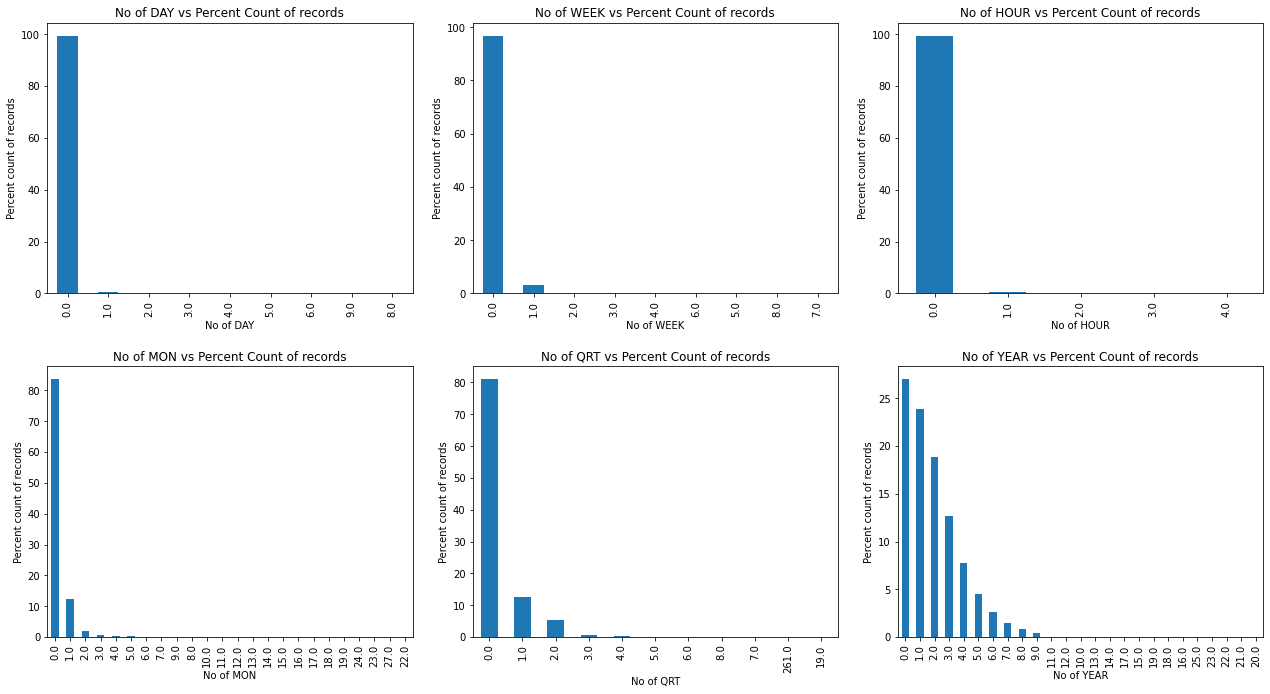

In [20]:
#providing inputs to the subplot function 
list_Cols = ['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
bar_plot(list_Cols)

***
`NOTE :` As 99% of the values in `AMT_REQ_CREDIT_BUREAU_HOUR`, `AMT_REQ_CREDIT_BUREAU_DAY`, `AMT_REQ_CREDIT_BUREAU_MON`,
`AMT_REQ_CREDIT_BUREAU_WEEK`,`AMT_REQ_CREDIT_BUREAU_QRT` columns are 0, hence it is safe to impute missing values with 0
For `AMT_REQ_CREDIT_BUREAU_YEAR` column we can impute missing values with the median number of years
***

In [21]:
#replacing null values with appropriate values for the following columns
data.fillna({'AMT_REQ_CREDIT_BUREAU_HOUR':0,
 'AMT_REQ_CREDIT_BUREAU_DAY':0,
 'AMT_REQ_CREDIT_BUREAU_WEEK':0,
 'AMT_REQ_CREDIT_BUREAU_MON':0,
 'AMT_REQ_CREDIT_BUREAU_QRT':0,
 'AMT_REQ_CREDIT_BUREAU_YEAR':data.AMT_REQ_CREDIT_BUREAU_YEAR.median()},inplace=True,)
print('Null Values replaced Successfully')

Null Values replaced Successfully


In [22]:
#Handling Invalid Data
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [23]:
#gather all the columns with object as datatype
o_data = data.select_dtypes('object').columns.tolist()
o_data

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3']

In [24]:
#check various columns
data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [25]:
data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

***
`NOTE :` There are 4 entries which do not belong to MALE/FEMALE Csutomers,Thus we can drop records respective to these values
***

In [26]:
#Dropping records with XNA values
drop_genders = data[data.CODE_GENDER =="XNA"].index
data.drop(drop_genders, inplace=True)
print('entries dropped successfully')

entries dropped successfully


In [27]:
data.FLAG_OWN_CAR.value_counts()

N    202922
Y    104585
Name: FLAG_OWN_CAR, dtype: int64

In [28]:
data.FLAG_OWN_REALTY.value_counts()

Y    213308
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [29]:
data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [30]:
data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

***
`NOTE :` There are 55374 records where there is no information about the Organisation Type, we can keep it as-is.
***

In [31]:
data.NAME_HOUSING_TYPE.value_counts()

House / apartment      272865
With parents            14840
Municipal apartment     11182
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [32]:
#Gather All the numerical columns from the Dataset
n_data = data.select_dtypes('int64').columns.tolist()
data[n_data]

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,-9461,-637,-2120,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,-16765,-1188,-291,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,-19046,-225,-2531,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,-19005,-3039,-2437,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,-19932,-3038,-3458,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,-9327,-236,-1982,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,0,-20775,365243,-4090,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,0,-14966,-7921,-5150,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,0,-11961,-4786,-931,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


***
`NOTE :` Since there are Days_* columns with the duration data till the loan application was made, as we do not have age data of the customer we can calculate the same from DAYS_BIRTH.
***

In [33]:
#Let's create a new feature Age (in Years)
data['Age_Years'] = data.DAYS_BIRTH.apply(lambda x: int(np.floor(abs(x)/365)))
print('new feature created Successfully')

new feature created Successfully


In [34]:
#Gather all the float columns from the dataset
f_data = data.select_dtypes('float64')
f_data

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,0.0,0.0,0.0,0.0,-273.0,0.0,0.0,0.0,0.0,0.0,1.0
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,6.0,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


***
`NOTE :`There are two columns, DAYS_REGISTRATION and DAYS_LAST_PHONE_CHANGE which should have been of type int64, so lets change their data type
***

In [35]:
#Changing the datatype of column in an dataframe
data.DAYS_REGISTRATION = data.DAYS_REGISTRATION.astype('int64')
data.DAYS_LAST_PHONE_CHANGE = data.DAYS_LAST_PHONE_CHANGE.notna().astype('int64')
print('Data-Type of given columns changed Successfully')

Data-Type of given columns changed Successfully


## Analysis :

***
## $$ TASK - 1 $$
***

**Required Task :** Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier.

In [36]:
#Gather all the numeric columns 
num_col = data.select_dtypes(['int64','float64'])
num_col

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_Years
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,56
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,41
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,32


In [37]:
#find the outlier using box-plot
#Function to plot subplot for the AMT_* columns
def box_plot(df,col_list):
    plt.figure(figsize=[16,12])
    i=1
    for col in col_list:
        plt.subplot(2,3,i)
        sns.boxplot(data=df[col]).set(title='Box plot for '+col.replace('_',' '))
        i+=1
    plt.tight_layout(pad=2.0)
    plt.show()
print('function created successfully')

function created successfully


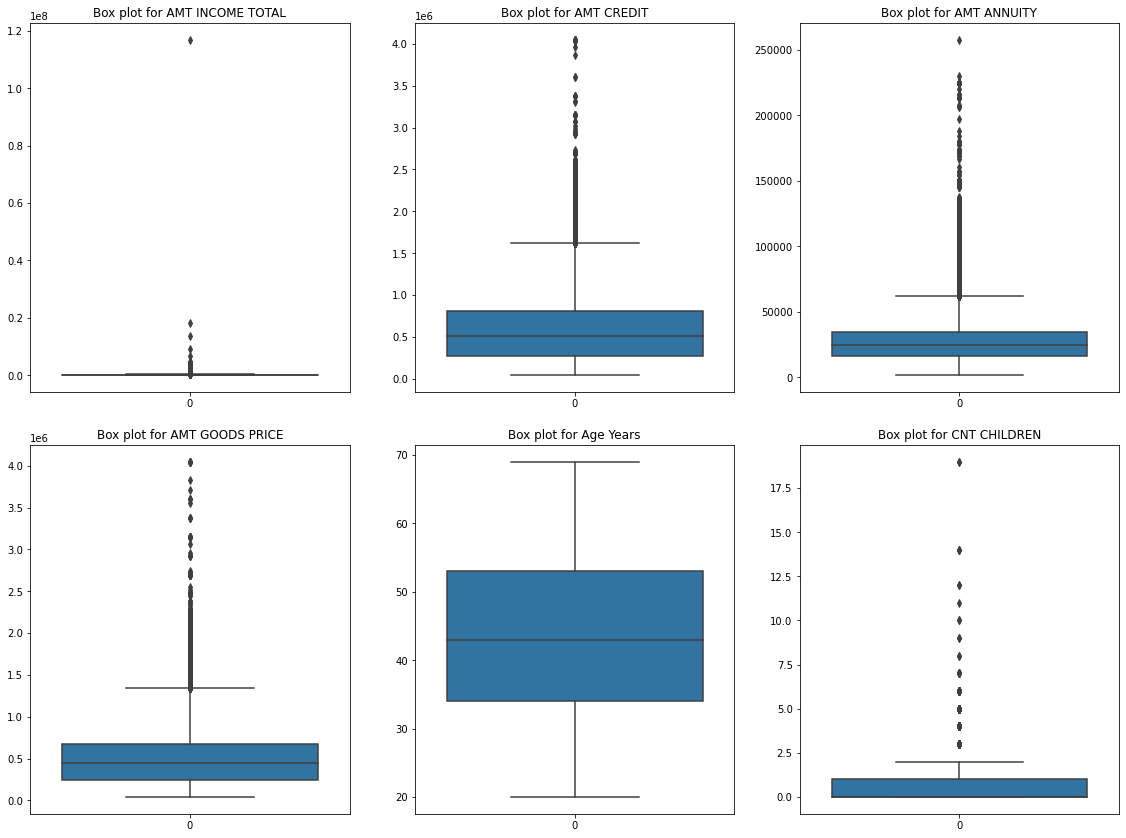

In [38]:
#create a object with required columns to create plot and check for outlier 
col_list = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','Age_Years', 'CNT_CHILDREN']
box_plot(data,col_list)

In [39]:
#remove the outliers by knowing their presence in the quantiles
data.AMT_INCOME_TOTAL.describe()

count    3.075070e+05
mean     1.687977e+05
std      2.371246e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [40]:
#remove the value above 90th quantile
INCOME_90 = data.AMT_INCOME_TOTAL.quantile(q=0.9)

In [41]:
#let's see the distribution of Loam amount credited
data.AMT_CREDIT.describe()

count    3.075070e+05
mean     5.990286e+05
std      4.024926e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [42]:
#remove the values above 95th quantile
CREDIT_95 = data.AMT_CREDIT.quantile(q=0.95)

In [43]:
#let's see the distribution of Loan Annuity
data.AMT_ANNUITY.describe()

count    307495.000000
mean      27108.666786
std       14493.798379
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [44]:
#remove the values above 97th quantile
ANNUITY_97 = data.AMT_ANNUITY.quantile(q=0.97)

In [45]:
#let's see the distribution of Goods price 
data.AMT_GOODS_PRICE.describe()

count    3.072290e+05
mean     5.383977e+05
std      3.694472e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [46]:
#remove the values above 97th quantile
GOODS_PRICE_97 = data.AMT_GOODS_PRICE.quantile(q=0.97)

In [47]:
#let's see the distribution of count of children
data.CNT_CHILDREN.describe()

count    307507.000000
mean          0.417047
std           0.722119
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [48]:
#remove the values above 99th quantile 
CNT_CHILDREN_999 = data.CNT_CHILDREN.quantile(q=0.99)

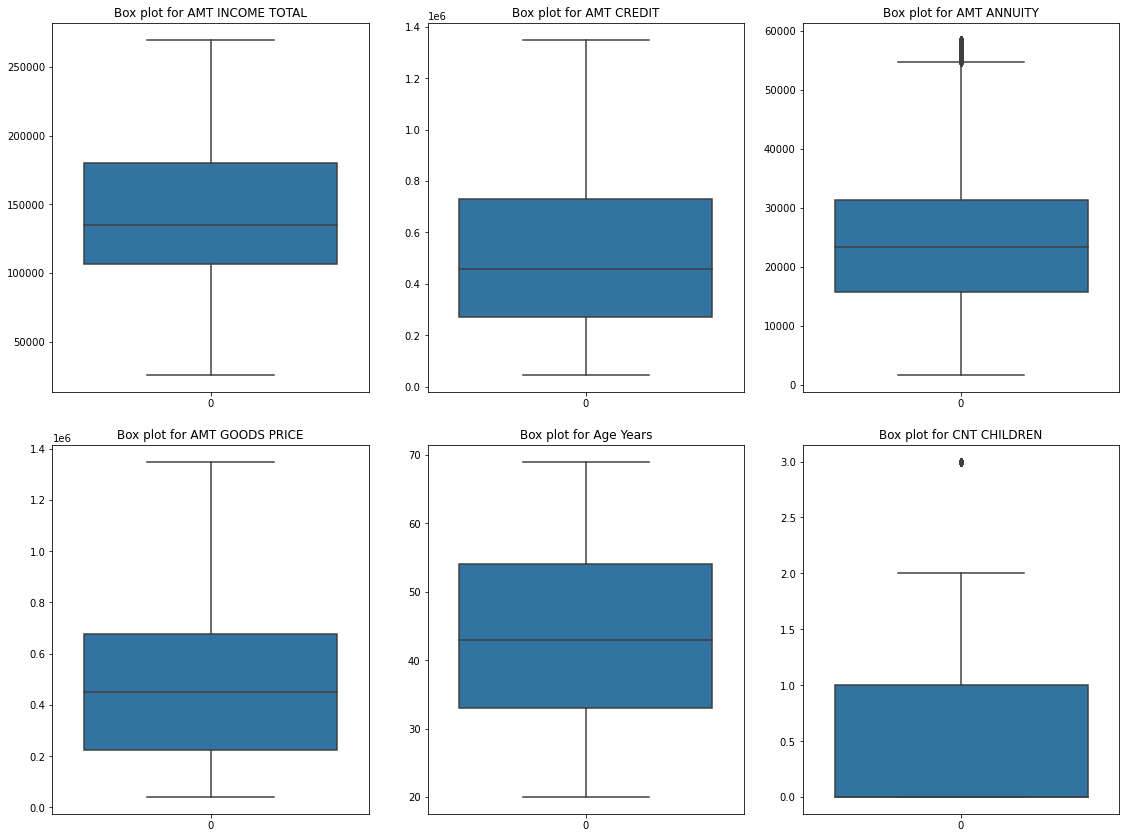

In [49]:
#Remove the Outliers
#created a copy of the dataframe and removed outliers from it
app_data_final=data.copy()
app_data_final=app_data_final[app_data_final['AMT_INCOME_TOTAL'] <=INCOME_90]
app_data_final=app_data_final[app_data_final['AMT_ANNUITY'] <=ANNUITY_97]
app_data_final=app_data_final[app_data_final['AMT_GOODS_PRICE'] <=GOODS_PRICE_97]
app_data_final=app_data_final[app_data_final['CNT_CHILDREN'] <=CNT_CHILDREN_999]
app_data_final=app_data_final[app_data_final['AMT_CREDIT'] <=CREDIT_95]

#let's verify the columns after removing the outliers
box_plot(app_data_final,col_list)


***
`NOTE :` From above graph it is clear that majority of the outlier values have been removed(some have been kept for analysis purpose).
***

***
# $$ TASK - 2 $$ 
***

**Required Task :** Identify if there is data imbalance in the data. Find the ratio of data imbalance. \
`Hint:` Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.

In [50]:
#Check if there any continous numerical columns 
data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_Years
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,46
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,37
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,51
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,55
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,39


`NOTE :` From above `ATM_*` and `Age_Years` have continous numerical values, hence we can bin them 
***

In [51]:
 #let's see the distribution of Ages
app_data_final.Age_Years.describe()

count    267247.000000
mean         43.465386
std          12.167106
min          20.000000
25%          33.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: Age_Years, dtype: float64

In [52]:
#Binning the Age column
cut_labels = ['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70','71-80']
cut_bins = [0, 10,20,30,40,50,60,70,80]
app_data_final['Age_Groups'] = pd.cut(app_data_final['Age_Years'], bins=cut_bins, labels=cut_labels)
app_data_final['Age_Groups'].value_counts()

31-40    70840
41-50    62526
51-60    58987
21-30    47769
61-70    27124
11-20        1
0-10         0
71-80        0
Name: Age_Groups, dtype: int64

***
Now let's bin `AMT_INCOME_TOTAL` column 

In [53]:
app_data_final.AMT_INCOME_TOTAL.describe()

count    267247.000000
mean     144655.930464
std       54791.806797
min       25650.000000
25%      106411.500000
50%      135000.000000
75%      180000.000000
max      270000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [54]:
#Binning the Income column
cut_lbl = ['0-50000', '50001-100000', '100001-150000', '150001-200000','200001-250000','250001-300000']
cut_bns = [0, 50000, 100000, 150000, 200000, 250000, 300000]
app_data_final['INCOME_GROUP'] = pd.cut(app_data_final['AMT_INCOME_TOTAL'], bins=cut_bns, labels=cut_lbl)
app_data_final['AMT_INCOME_TOTAL']

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 267247, dtype: float64

***
# $$ TASK - 3 $$ 
***

**Required Task :** Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

## Univariate Analysis : 

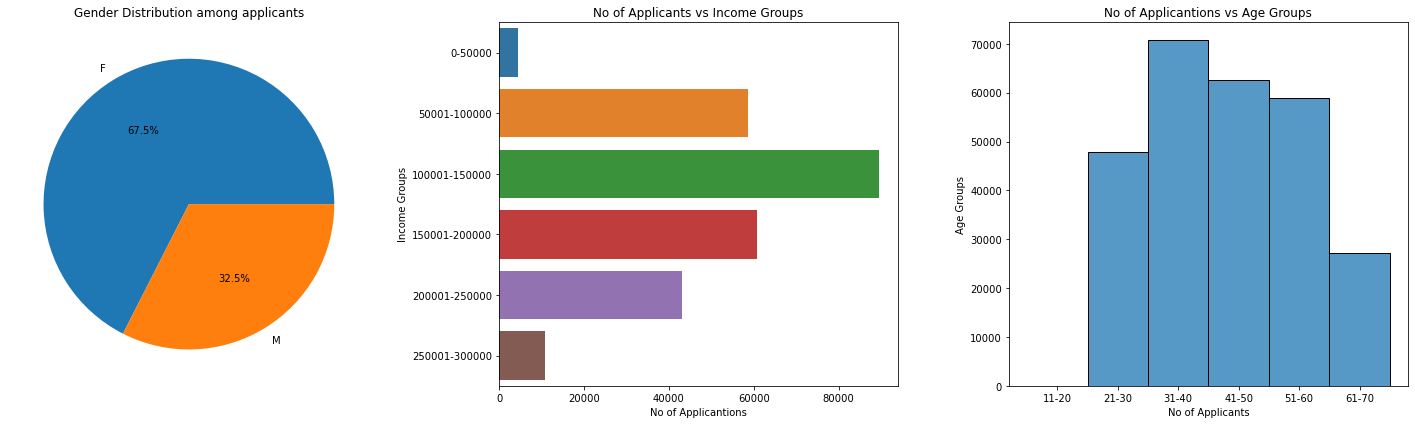

In [55]:
plt.figure(figsize=[20,6])

plt.subplot(1,3,1)

GENDER = app_data_final.CODE_GENDER.value_counts(normalize=True).rename_axis('Gender').reset_index(name='Count')
plt.pie(data=GENDER, x=GENDER.Count, labels=GENDER.Gender, autopct='%1.1f%%')
plt.title('Gender Distribution among applicants')

plt.subplot(1,3,2)
INCOME = app_data_final.INCOME_GROUP.value_counts().rename_axis('Income_Groups').reset_index(name='Income Amount')
sns.barplot(y=INCOME.Income_Groups, x=INCOME['Income Amount']).set(xlabel='No of Applicantions', ylabel='Income Groups', title='No of Applicants vs Income Groups')

plt.subplot(1,3,3)
AGE = app_data_final.Age_Groups
sns.histplot(AGE).set(xlabel='No of Applicants', ylabel='Age Groups', title='No of Applicantions vs Age Groups')


plt.tight_layout()
plt.show()

`Insights :` 
1. The percentage of females is higher compared to males in loan applications
2. Higher loan applications have come from applicants with income group 100001-150000
3. People in age group 31-40 have applied the highest number of loans
***

### Segmentation : 
Let's Divide the DataFrame into 2, defaulter(Target 1) and non-defaulter(Target 0)

In [56]:
target_1 = app_data_final[app_data_final['TARGET']==1].iloc[:,1:]   #Defaullter
target_0 = app_data_final[app_data_final['TARGET']==0].iloc[:,1:]   #NOn-Defaulter

In [57]:
#Lets check target 1
target_1.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_Years,Age_Groups,INCOME_GROUP
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,25,21-30,200001-250000
26,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,...,0,0.0,0.0,0.0,0.0,2.0,2.0,51,51-60,100001-150000
40,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,...,0,0.0,0.0,0.0,2.0,0.0,4.0,47,41-50,200001-250000
42,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,...,0,0.0,0.0,0.0,0.0,0.0,2.0,36,31-40,100001-150000
81,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,67,61-70,50001-100000


In [58]:
#Lets check target 0
target_0.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_Years,Age_Groups,INCOME_GROUP
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,45,41-50,250001-300000
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,52,51-60,50001-100000
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,52,51-60,100001-150000
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,54,51-60,100001-150000
5,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0.0,0.0,0.0,0.0,1.0,1.0,46,41-50,50001-100000


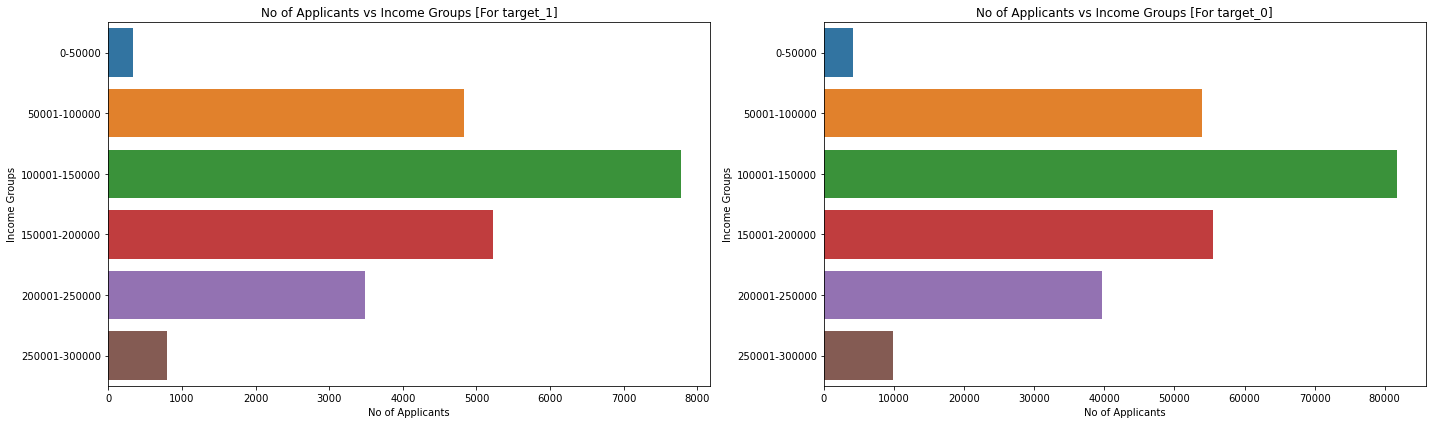

In [59]:
#Categorical Ordered Variables
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
INCOME1 = target_1.INCOME_GROUP.value_counts().rename_axis('Income_Groups').reset_index(name='No of Applicants')
sns.barplot(y=INCOME1.Income_Groups, x=INCOME1['No of Applicants']).set(xlabel='No of Applicants', ylabel='Income Groups', title='No of Applicants vs Income Groups [For target_1]')

plt.subplot(1,2,2)
INCOME0 = target_0.INCOME_GROUP.value_counts().rename_axis('Income_Groups').reset_index(name='No of Applicants')
sns.barplot(y=INCOME0.Income_Groups, x=INCOME0['No of Applicants']).set(xlabel='No of Applicants', ylabel='Income Groups', title='No of Applicants vs Income Groups [For target_0]')


plt.tight_layout()
plt.show()


`Insights :` The number of applications in income group 100001-150000 have most defaults as well as success. Whereas, income group 0-50000 has lowest defaults as well as non-defaults.
***

## BiVariate Analysis on Segmented Data : 

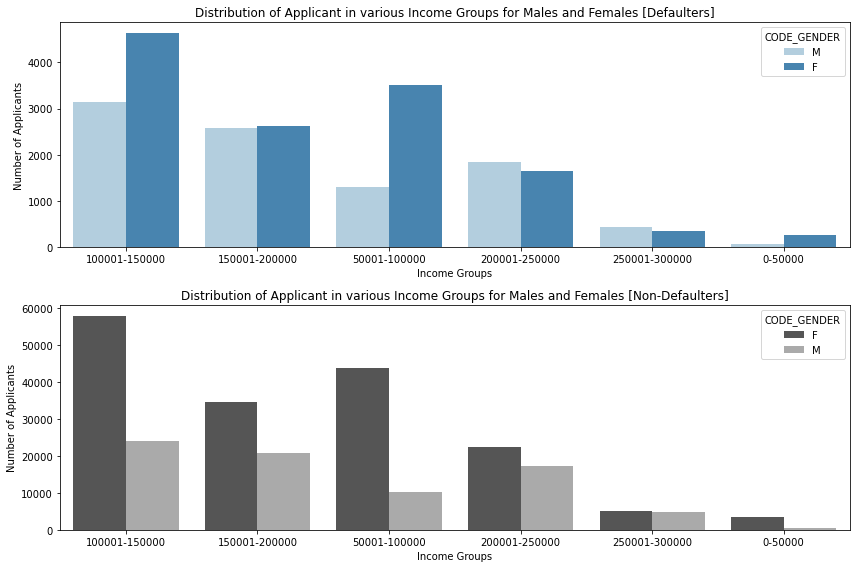

In [60]:
plt.figure(figsize=[12,8])
plt.yscale('log')
plt.subplot(211)
sns.countplot(data = target_1, x='INCOME_GROUP' , order=target_1['INCOME_GROUP'].value_counts().index,hue = target_1['CODE_GENDER'],palette='Blues').set(xlabel='Income Groups', ylabel='Number of Applicants', title='Distribution of Applicant in various Income Groups for Males and Females [Defaulters]')
plt.subplot(212)
sns.countplot(data = target_0, x='INCOME_GROUP' , order=target_0['INCOME_GROUP'].value_counts().index,hue = target_0['CODE_GENDER'],palette='gray').set(xlabel='Income Groups', ylabel='Number of Applicants', title='Distribution of Applicant in various Income Groups for Males and Females [Non-Defaulters]')
plt.tight_layout()
plt.show()

`Insight :` Number of Loan Applications from Females are greater in all income groups compared to men.
***

## Univariate Analysis on segmented Data :

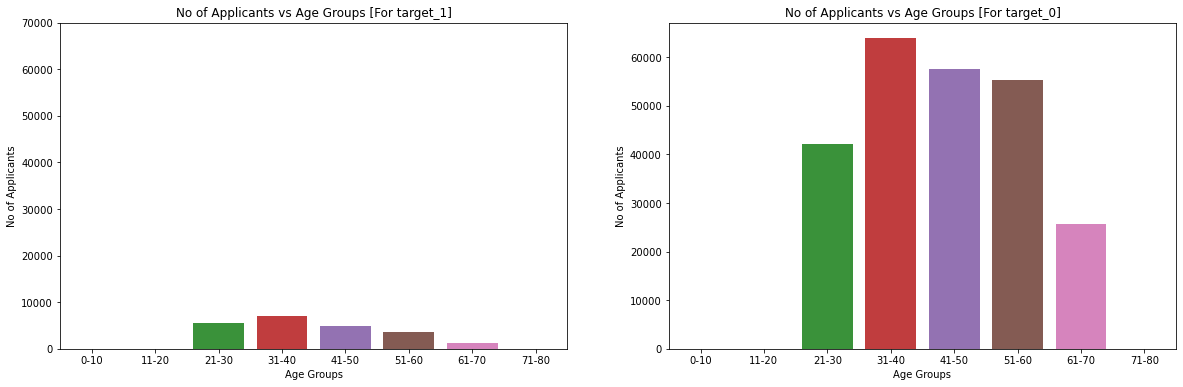

In [61]:
plt.figure(figsize=[20,6])
plt.ylim((0,70000))
plt.subplot(1,2,1)
AGE = target_1.Age_Groups.value_counts().rename_axis('AGE_Grps').reset_index(name='No. of Applicants')
sns.barplot(y=AGE['No. of Applicants'], x=AGE.AGE_Grps).set(ylabel='No of Applicants', xlabel='Age Groups', title='No of Applicants vs Age Groups [For target_1]')
plt.ylim((0,70000))
plt.subplot(1,2,2)
AGE = target_0.Age_Groups.value_counts().rename_axis('AGE_Grps').reset_index(name='No. of Applicants')
sns.barplot(y=AGE['No. of Applicants'], x=AGE.AGE_Grps).set(ylabel='No of Applicants', xlabel='Age Groups', title='No of Applicants vs Age Groups [For target_0]')

plt.show()

`Insight :` Number of loans that were defaulted and not defaulted are highest in age group 31 to 40 years and it decreases as age increases or decreases.
******

In [62]:
#Lets check the number of applicants during each day of the week
week_days = target_1.WEEKDAY_APPR_PROCESS_START.value_counts().rename_axis('Week_Days').reset_index(name='No. of Applicants')
week_days

,Week_Days,No. of Applicants
0,TUESDAY,4065
1,WEDNESDAY,3840
2,FRIDAY,3722
3,THURSDAY,3670
4,MONDAY,3532
5,SATURDAY,2446
6,SUNDAY,1179


`Insight :` From above we can conclude that most of the people apply for loans on `TUESDAY` and `SUNDAY` has least number of loan applicants.
***

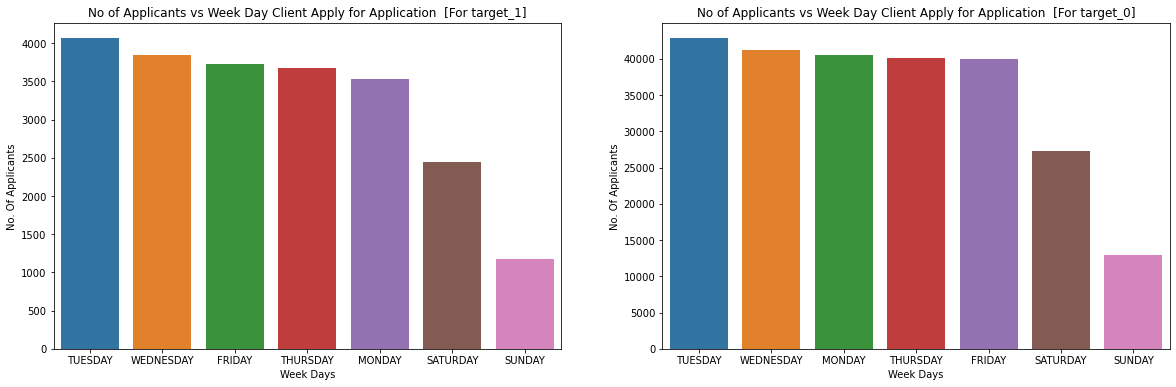

In [63]:
#Lets plot/picturize the above given insight
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)

week_days = target_1.WEEKDAY_APPR_PROCESS_START.value_counts().rename_axis('Week_Days').reset_index(name='No. of Applicants')
sns.barplot(y=week_days['No. of Applicants'], x=week_days.Week_Days).set(xlabel='Week Days', ylabel='No. Of Applicants', title='No of Applicants vs Week Day Client Apply for Application  [For target_1]')

plt.subplot(1,2,2)
week_days = target_0.WEEKDAY_APPR_PROCESS_START.value_counts().rename_axis('Week_Days').reset_index(name='No. of Applicants')
sns.barplot(y=week_days['No. of Applicants'], x=week_days.Week_Days).set(xlabel='Week Days', ylabel='No. Of Applicants', title='No of Applicants vs Week Day Client Apply for Application  [For target_0]')

plt.show()

In [64]:
#Lets check out the Analysis for Categorical Ordered Values
#Creating a function to plot pie-charts
def pie_plot(col_name ):
    plt.figure(figsize=[20,6])

    plt.subplot(1,2,1)
    col_pie = target_1[col_name].value_counts(normalize=True).rename_axis('Type').reset_index(name='Count')
    plt.pie(data=col_pie, x=col_pie.Count, labels=col_pie.Type, autopct='%1.1f%%')
    plt.title('Pie Chart for Column ' + col_name + ' [For target_1]')

    plt.subplot(1,2,2)
    col_pie = target_0[col_name].value_counts(normalize=True).rename_axis('Type').reset_index(name='Count')
    plt.pie(data=col_pie, x=col_pie.Count, labels=col_pie.Type, autopct='%1.1f%%')
    plt.title('Pie Chart for Column ' + col_name + ' [For target_0]')
    plt.show()
print('Function Created Successfully')

Function Created Successfully


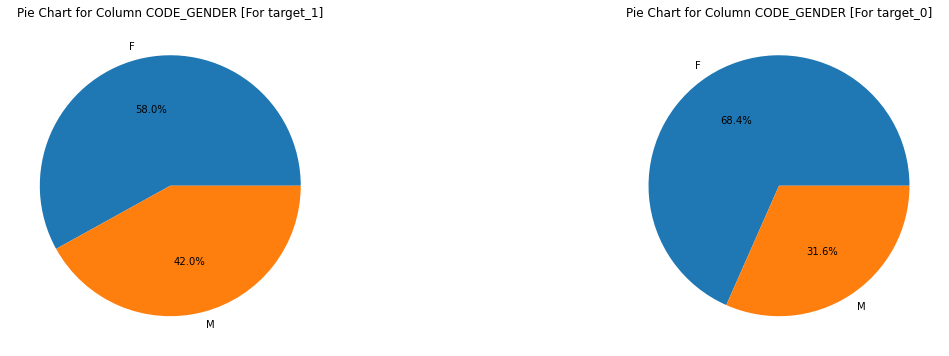

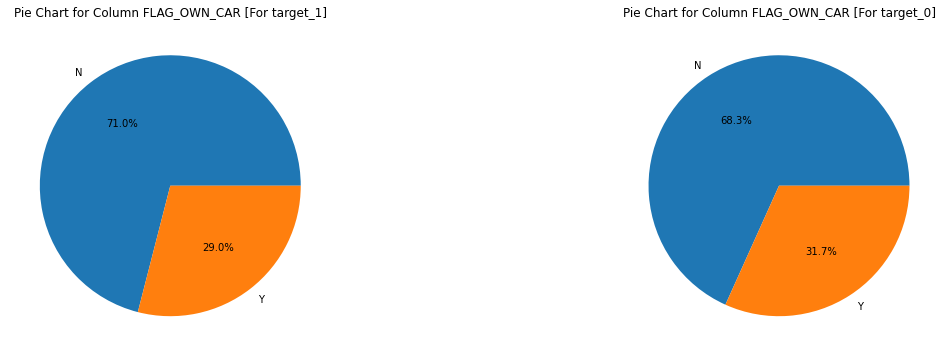

In [65]:
#Plotting the pie-chart's
pie_plot('CODE_GENDER')
pie_plot('FLAG_OWN_CAR')

`Insight :`
1. Proportion of females is higher than males in both defaulters and non-defaulters
2. Proportion of both defaulters and non-defaulters not having a car is higher than those who have it.
***

In [66]:
#Create a function to bar plot the given column 
def barp_plot(col_name):
    plt.figure(figsize=[22,10])

    plt.subplot(1,2,1)
    target_1[col_name].value_counts().plot.barh()
    plt.title('Bar Chart for Column ' + col_name + ' [For target_1]')
    plt.xlabel('Number of Loan Applicantions',fontdict={'fontsize':20,'fontweight':5})
    plt.ylabel(col_name,fontdict={'fontsize':20,'fontweight':5})
    plt.subplot(1,2,2)
    target_0[col_name].value_counts().plot.barh()
    plt.title('Bar Chart for Column ' + col_name + ' [For target_0]')
    plt.xlabel('Number of Loan Applicantions',fontdict={'fontsize':20,'fontweight':5})
    plt.ylabel(col_name,fontdict={'fontsize':20,'fontweight':5})
    plt.tight_layout()
    plt.show()
print('Function Created Successfully')

Function Created Successfully


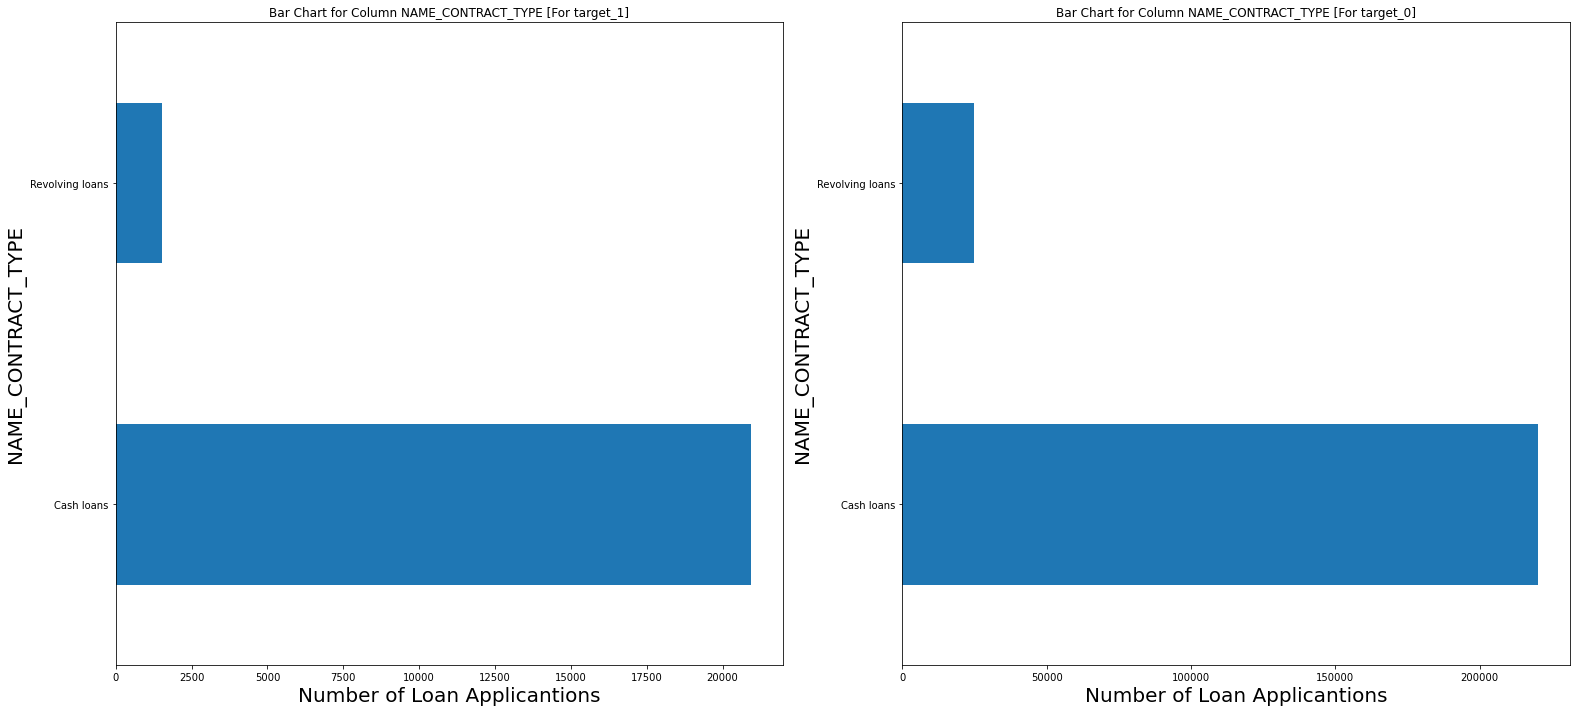

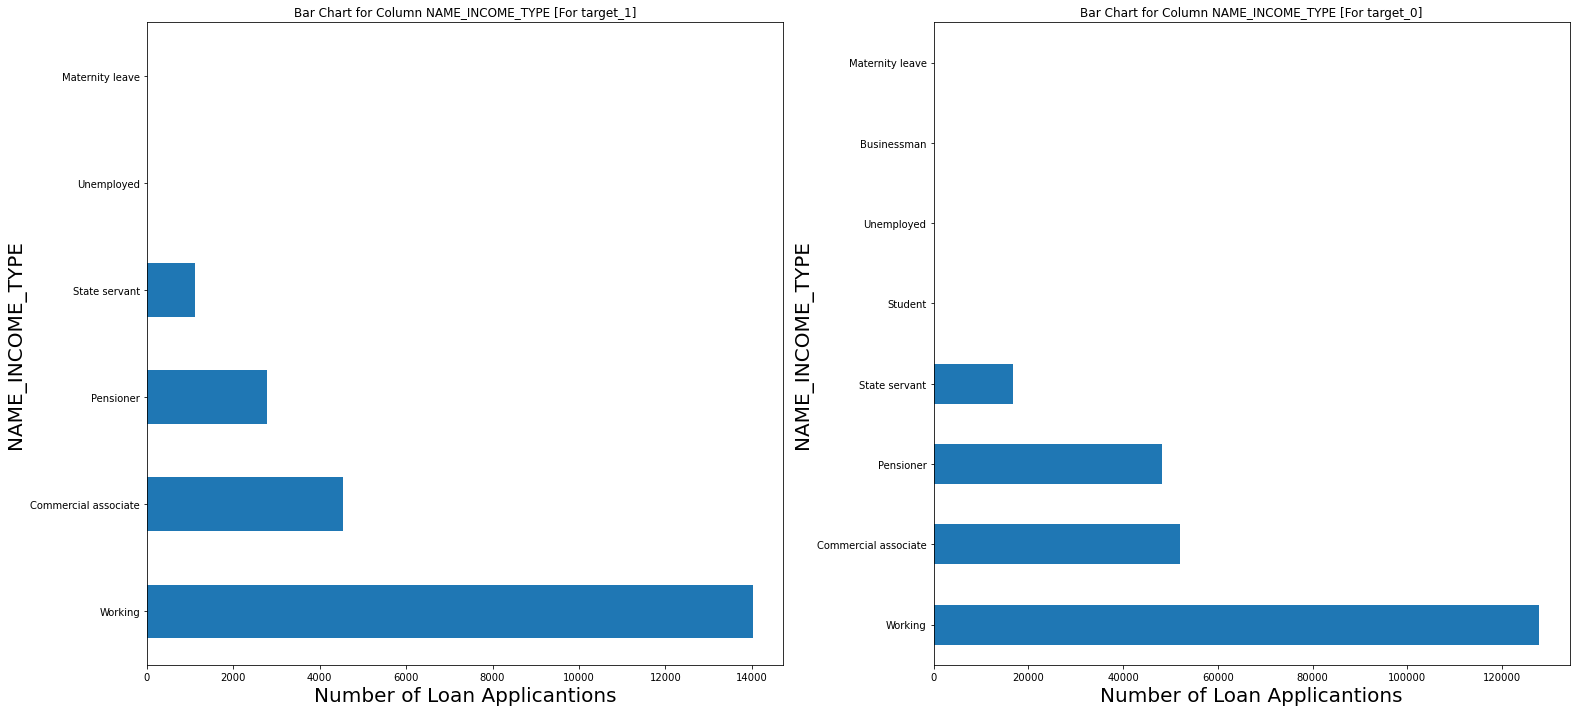

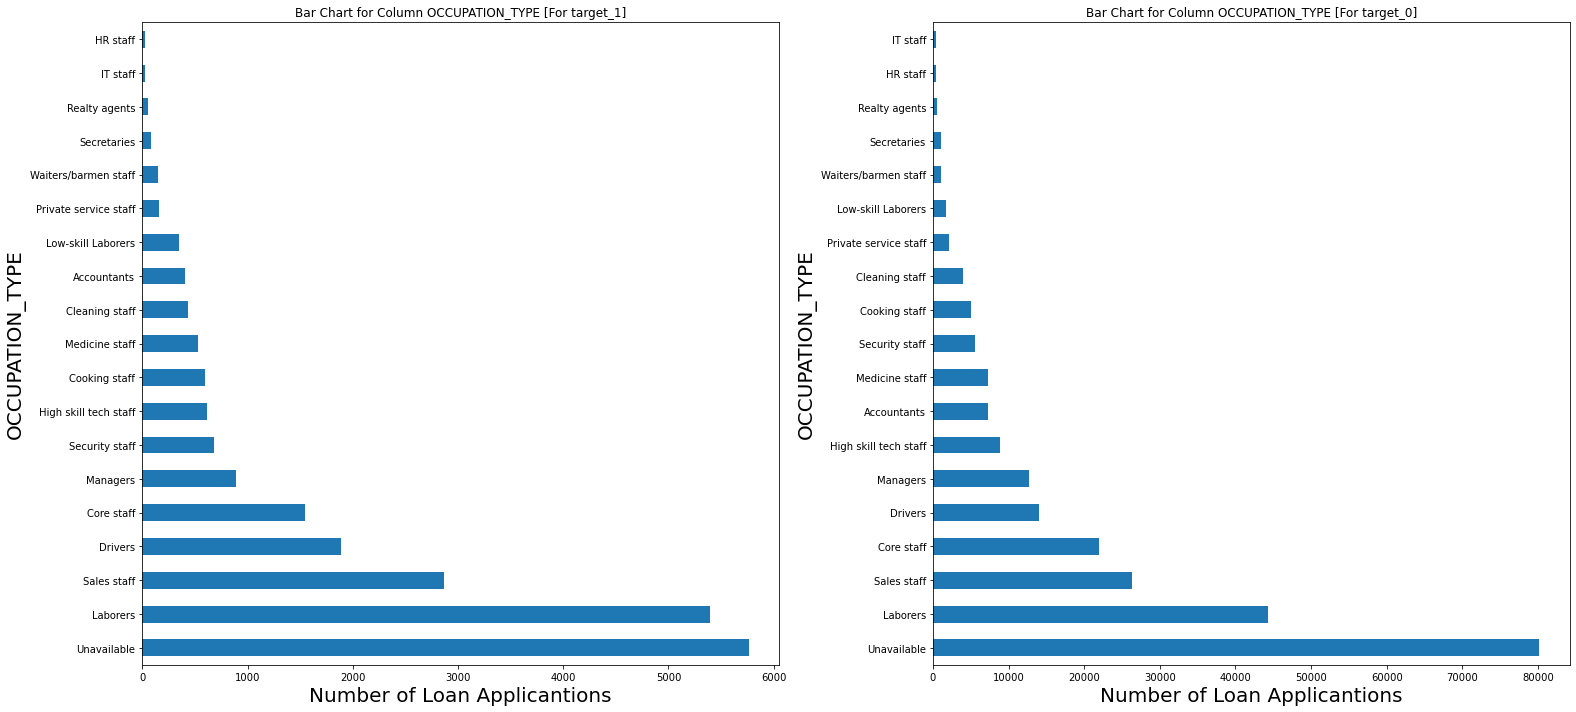

In [67]:
#Let's plot the bar plots
barp_plot('NAME_CONTRACT_TYPE')
barp_plot('NAME_INCOME_TYPE')
barp_plot('OCCUPATION_TYPE')

`Insight :`
1. Number of applications with cash loans are higher than revolving loan in both defaulted and non-defaulted applications.
2. People from working income background have applied higher number of loan applications than other income type and this category has highest defaulted loans.
3. Occupation type which has highest number of defaulted and non-defaulted loans is unknown.
***

***
# $$ TASK - 4 $$
***

**Required Task :** Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.

## Multivariate Analysis 
**Correlation Matrix**

In [68]:
#Creating correlation matrix for target 1
corr_mat_Day_1 = target_1[['CNT_CHILDREN','REGION_POPULATION_RELATIVE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED','Age_Years']].corr()
corr_mat_Day_1

,CNT_CHILDREN,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,Age_Years
CNT_CHILDREN,1.000000,-0.029654,-0.008080,0.007478,0.039965,-0.000508,-0.200216,-0.269711
REGION_POPULATION_RELATIVE,-0.029654,1.000000,0.074298,0.044716,0.036069,0.054921,0.017213,0.049290
AMT_INCOME_TOTAL,-0.008080,0.074298,1.000000,0.285432,0.369692,0.285449,-0.133282,-0.025524
AMT_CREDIT,0.007478,0.044716,0.285432,1.000000,0.740648,0.977780,0.000464,0.134940
AMT_ANNUITY,0.039965,0.036069,0.369692,0.740648,1.000000,0.736222,-0.090898,-0.002636
AMT_GOODS_PRICE,-0.000508,0.054921,0.285449,0.977780,0.736222,1.000000,0.006451,0.135994
DAYS_EMPLOYED,-0.200216,0.017213,-0.133282,0.000464,-0.090898,0.006451,1.000000,0.587542
Age_Years,-0.269711,0.049290,-0.025524,0.134940,-0.002636,0.135994,0.587542,1.000000


In [69]:
#Creating correlation matrix for target 0
corr_mat_Day_0= target_0[['CNT_CHILDREN','REGION_POPULATION_RELATIVE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED','Age_Years']].corr()
corr_mat_Day_0

,CNT_CHILDREN,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,Age_Years
CNT_CHILDREN,1.000000,-0.025975,0.029555,0.003340,0.024477,-0.001056,-0.256936,-0.348535
REGION_POPULATION_RELATIVE,-0.025975,1.000000,0.112623,0.036612,0.051794,0.042821,0.003195,0.028558
AMT_INCOME_TOTAL,0.029555,0.112623,1.000000,0.317760,0.395770,0.319129,-0.190788,-0.107829
AMT_CREDIT,0.003340,0.036612,0.317760,1.000000,0.761963,0.982109,-0.065451,0.047262
AMT_ANNUITY,0.024477,0.051794,0.395770,0.761963,1.000000,0.759378,-0.107317,-0.023603
AMT_GOODS_PRICE,-0.001056,0.042821,0.319129,0.982109,0.759378,1.000000,-0.062942,0.045430
DAYS_EMPLOYED,-0.256936,0.003195,-0.190788,-0.065451,-0.107317,-0.062942,1.000000,0.634399
Age_Years,-0.348535,0.028558,-0.107829,0.047262,-0.023603,0.045430,0.634399,1.000000


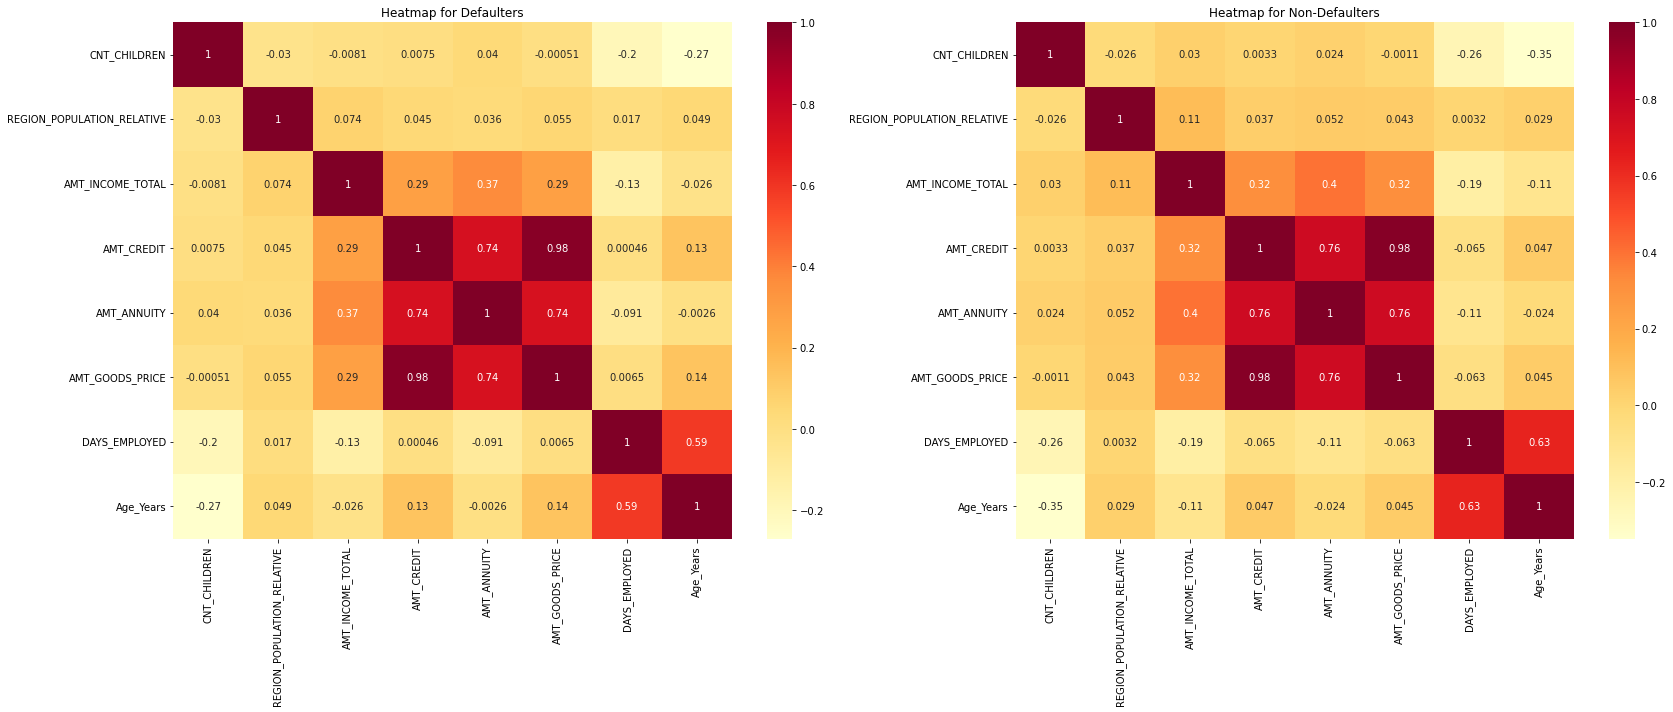

In [70]:
#Visualize the correlation matrix using heatmap
plt.figure(figsize=[24, 10])

plt.subplot(1,2,1)
sns.heatmap(annot= True, data=corr_mat_Day_1, cmap='YlOrRd').set(title='Heatmap for Defaulters')

plt.subplot(1,2,2)
sns.heatmap(annot= True, data=corr_mat_Day_0, cmap='YlOrRd').set(title='Heatmap for Non-Defaulters')
plt.tight_layout()
plt.show()

`Insight :`
1. From the above heatmap, it evident that there is strong correlation between the Goods Price and Loan Amount that was credited. Also, it can be seen that higher the age the number of days people were employed is also high. 
2. On the other hand, There is weak correlation between the age and count of children and between the loan annuity and number of days applicant was employed.
***

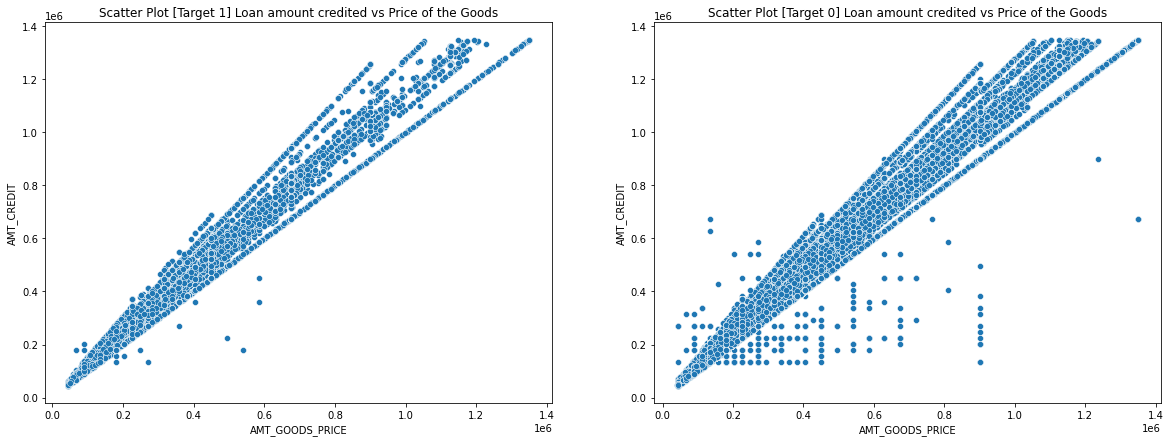

In [71]:
plt.figure(figsize=[20, 7])

plt.subplot(1,2,1)
sns.scatterplot(data=target_1, x='AMT_GOODS_PRICE', y='AMT_CREDIT').set(title='Scatter Plot [Target 1] Loan amount credited vs Price of the Goods')
plt.subplot(1,2,2)
sns.scatterplot(data=target_0, x='AMT_GOODS_PRICE', y='AMT_CREDIT').set(title='Scatter Plot [Target 0] Loan amount credited vs Price of the Goods')

plt.show()

`Insight :` From the above scatterplot, we can confirm that there is strong correlation between the Goods Price and Loan Amount that was credited.
***

In [72]:
#Creating a function to plot a boxplot with Eduction type and Family status
def box_plot_graph(df, y_value, title_graph):
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=45)
    sns.boxplot(data =df, x='NAME_EDUCATION_TYPE',y= y_value, hue ='NAME_FAMILY_STATUS',orient='v')
    plt.title(title_graph)
    plt.tight_layout()
    plt.show()
print('Function Created Successfully')

Function Created Successfully


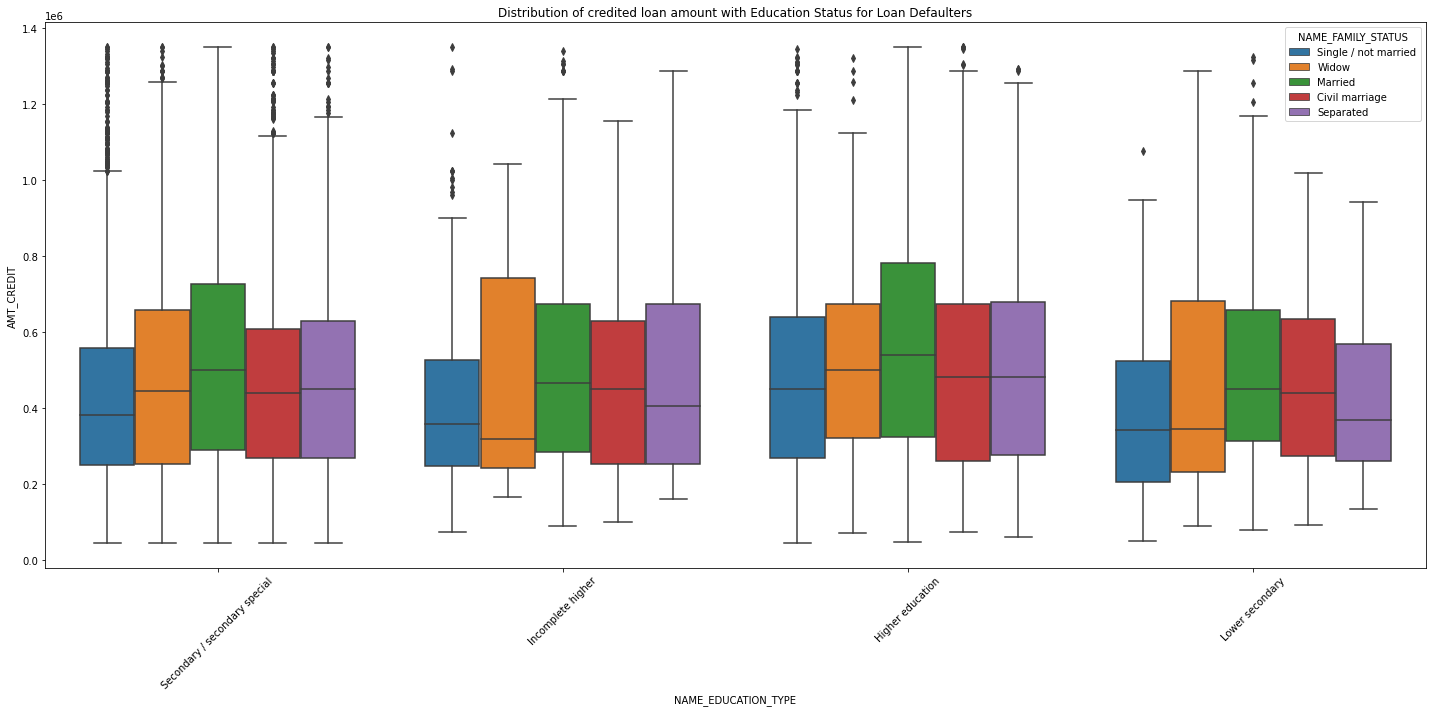

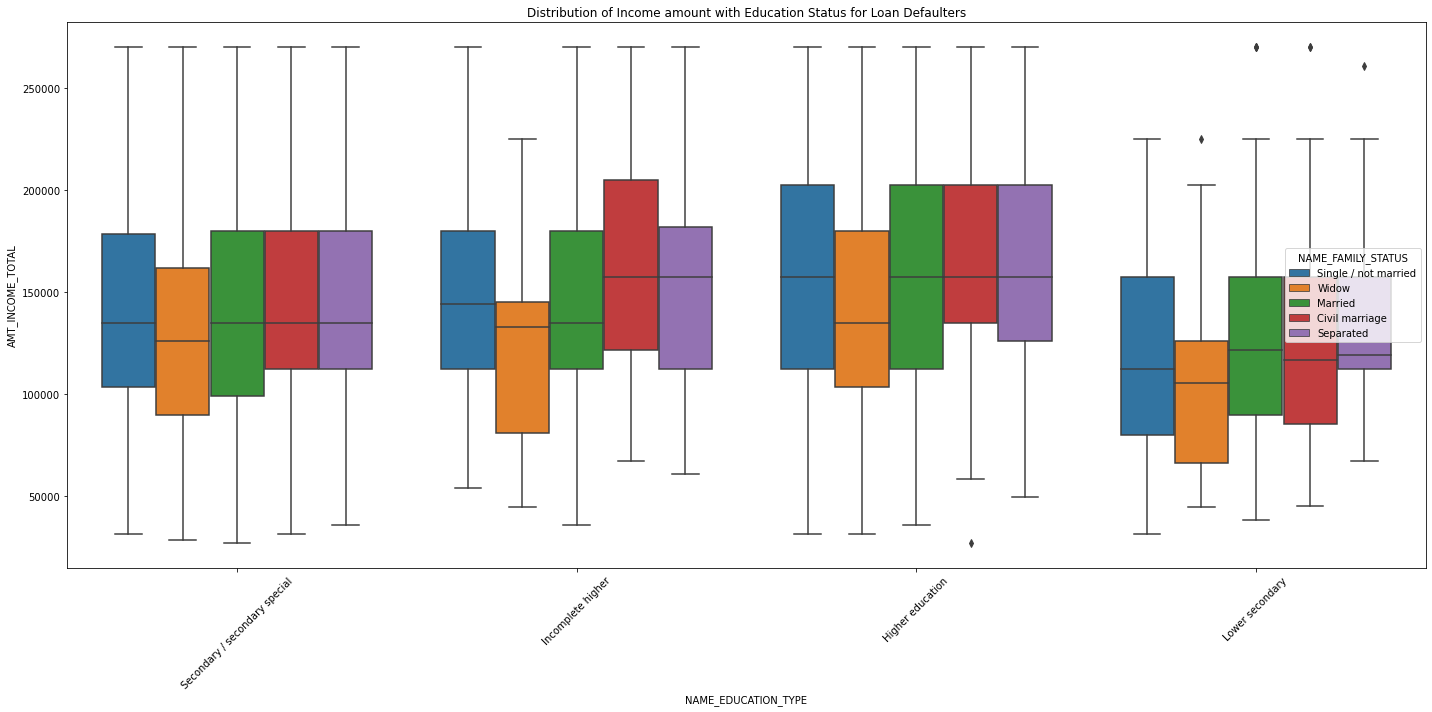

In [73]:
#Lets use the BoxPlot Function
box_plot_graph(target_1, 'AMT_CREDIT', 'Distribution of credited loan amount with Education Status for Loan Defaulters')
box_plot_graph(target_1, 'AMT_INCOME_TOTAL', 'Distribution of Income amount with Education Status for Loan Defaulters')

`Insight :` Married people with higher education background have defaulted loans for higher distribution of credited loan amounts. \
Married people with higher education background have defaulted loans for higher distribution of income.
***

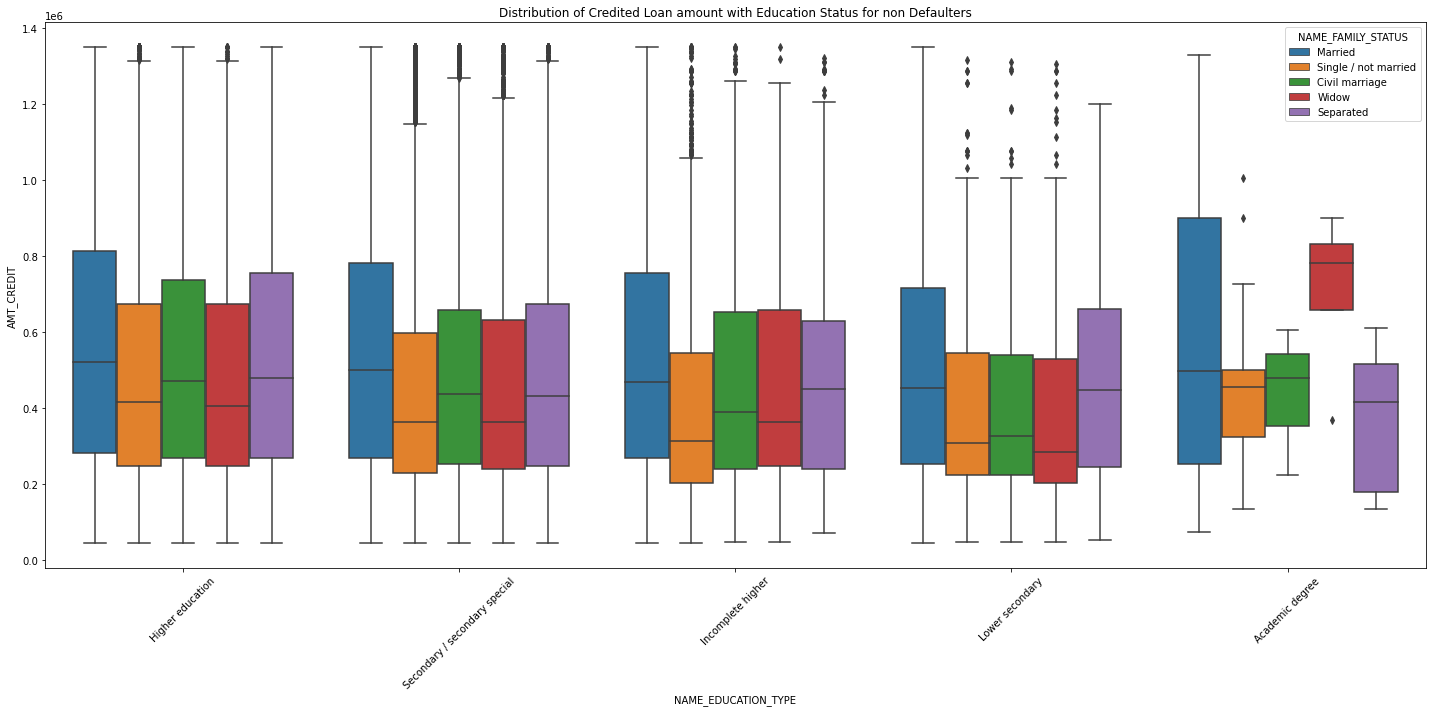

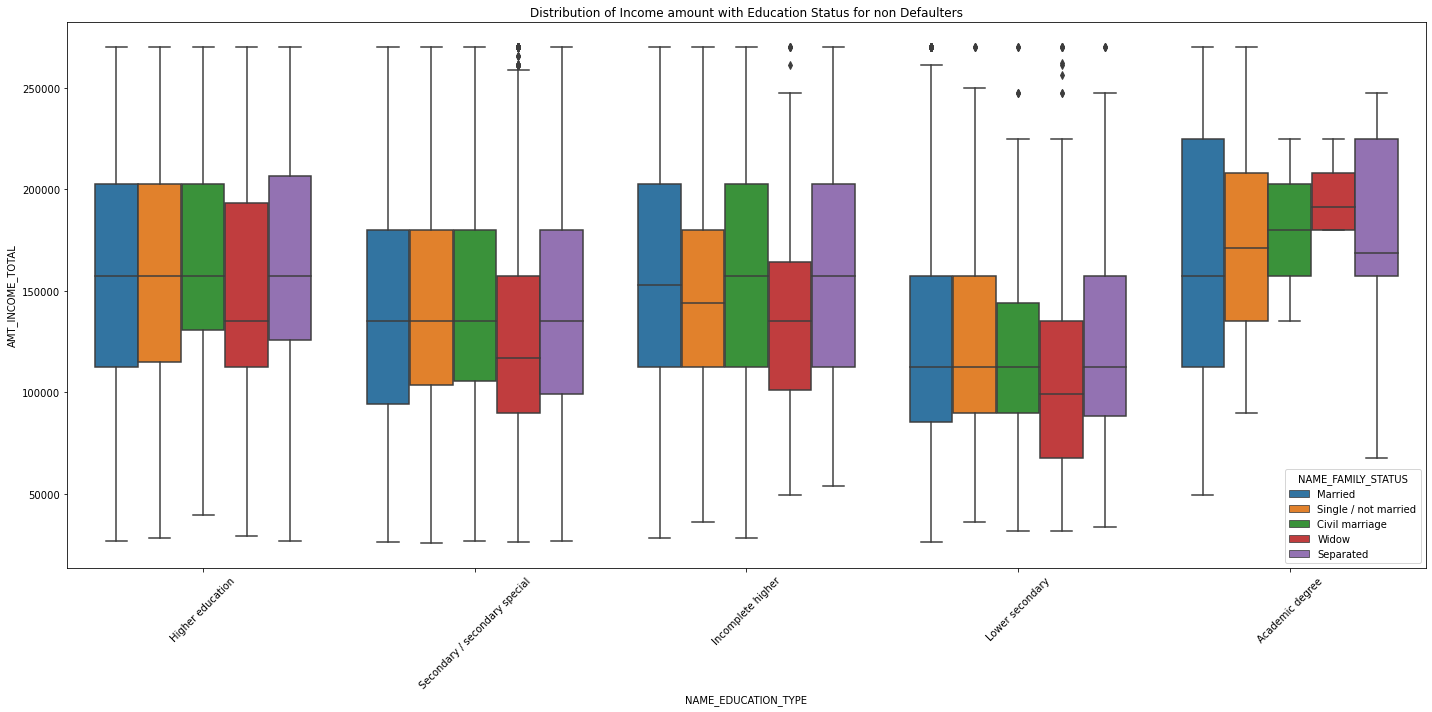

In [74]:
box_plot_graph(target_0, 'AMT_CREDIT', 'Distribution of Credited Loan amount with Education Status for non Defaulters')
box_plot_graph(target_0, 'AMT_INCOME_TOTAL', 'Distribution of Income amount with Education Status for non Defaulters')

`Insight :` Married people with higher education background have successful loans for higher distribution of credited loan amounts. \
Married poeple with higher education background have successful loans for higher distribution of income amounts. \
People with Academic degree have most successful loans.
***

## Merging Datasets

In [75]:
#Lets import previous applications dataset
data_prev_app = pd.read_csv(r"C:\Users\sarfaraaz\OneDrive\Desktop\Trainity\Bank Loan Case Study\previous_application.csv")
print('Dataset Loaded Successfully')

Dataset Loaded Successfully


In [76]:
data_prv_app_rows, data_prv_app_cols = data_prev_app.shape
print('Shape of Previous Applications Data: Rows',data_prv_app_rows,'Columns:',data_prv_app_cols)

Shape of Previous Applications Data: Rows 1670214 Columns: 37


In [83]:
#List of columns with missing values percentage greater than 40
prv_app_data_mis_vals = round(data_prev_app.isnull().sum()/data_prv_app_rows*100,2)
drop_cols_prv = prv_app_data_mis_vals[prv_app_data_mis_vals>40].index.tolist()

print('Number of Columns that have missing values percentage greater than 40%:', len(drop_cols_prv))

Number of Columns that have missing values percentage greater than 40%: 0


In [86]:
#Dropping the columns which have more than 40% missing values
data_prev_app.drop(labels=drop_cols_prv,axis=1,inplace=True)

# Now merging the Application dataset with previous appliaction dataset
final_df=pd.merge(left=data,right=data_prev_app,how='inner',on='SK_ID_CURR')
final_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE

In [87]:
#Renaming the columns after merger of datasets
final_df.rename({'NAME_CONTRACT_TYPE_x':'NAME_CONTRACT_TYPE_APP','AMT_CREDIT_x':'AMT_CREDIT_APP', 
'AMT_ANNUITY_x':'AMT_ANNUITY_APP', 'AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE_APP',
'WEEKDAY_APPR_PROCESS_START_x':'WEEKDAY_APPR_PROCESS_START_APP', 'HOUR_APPR_PROCESS_START_x':'HOUR_APPR_PROCESS_START_APP',
'NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_PRV', 'AMT_ANNUITY_y':'AMT_ANNUITY_PRV',
'AMT_CREDIT_y':'AMT_CREDIT_PRV', 'AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_PRV',
'WEEKDAY_APPR_PROCESS_START_y':'WEEKDAY_APPR_PROCESS_START_PRV', 'HOUR_APPR_PROCESS_START_y':'HOUR_APPR_PROCESS_START_PRV'}, axis=1, inplace=True)

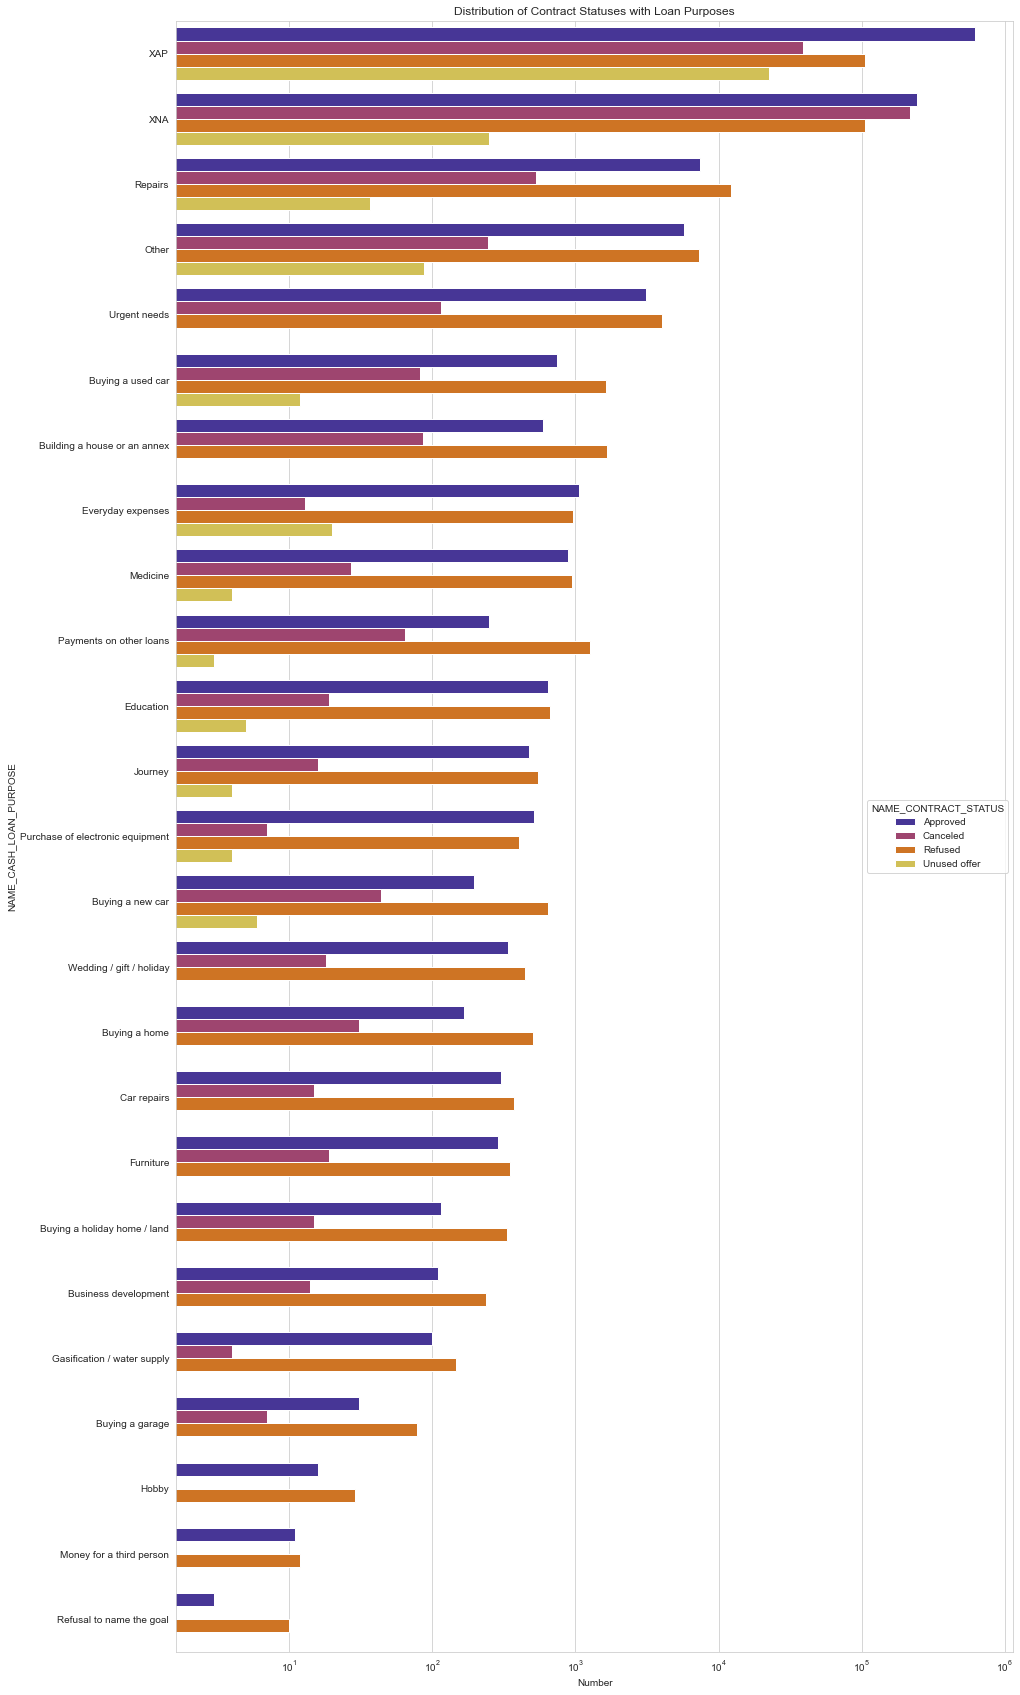

In [88]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
plt.figure(figsize=(15,30))
plt.xscale('log')
plt.title('Distribution of Contract Statuses with Loan Purposes')
ax = sns.countplot(data = final_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=final_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='CMRmap').set(xlabel='Number')

`Insight :`
1. When customers do not communicate their purpose for the loan bank has approved low number of applications.
2. For all the purposes of taking loans, bank has refused more applications that it approved.
3. The data related to purpose of taking loan is not clearly available, since there are highest number of application that were both approved and rejected for these purposes.
***

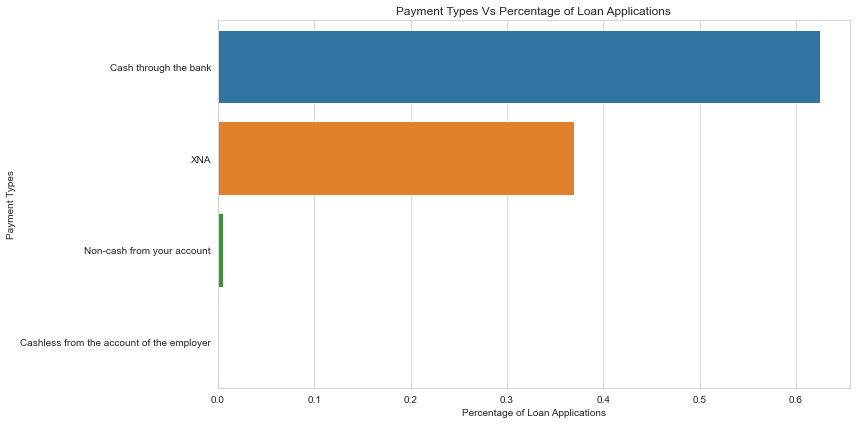

In [89]:
plt.figure(figsize=[12,6])
Payment_Type = final_df.NAME_PAYMENT_TYPE.value_counts(normalize=True).to_frame(name='Percentage of Loan Applications')
sns.barplot(data=Payment_Type, y=Payment_Type.index, x=Payment_Type['Percentage of Loan Applications'],orient='h').set(ylabel = 'Payment Types', title ='Payment Types Vs Percentage of Loan Applications')
plt.tight_layout()
plt.show()

`Insight :`
1. Most of the previous loans were repaid by Cash deposits.
2. The second highest mode of previous loan repayment has undisclosed methods (XNAs),
3. Non-Cash and Cashless contribute to extreme low percent of loan repayment methods.
***

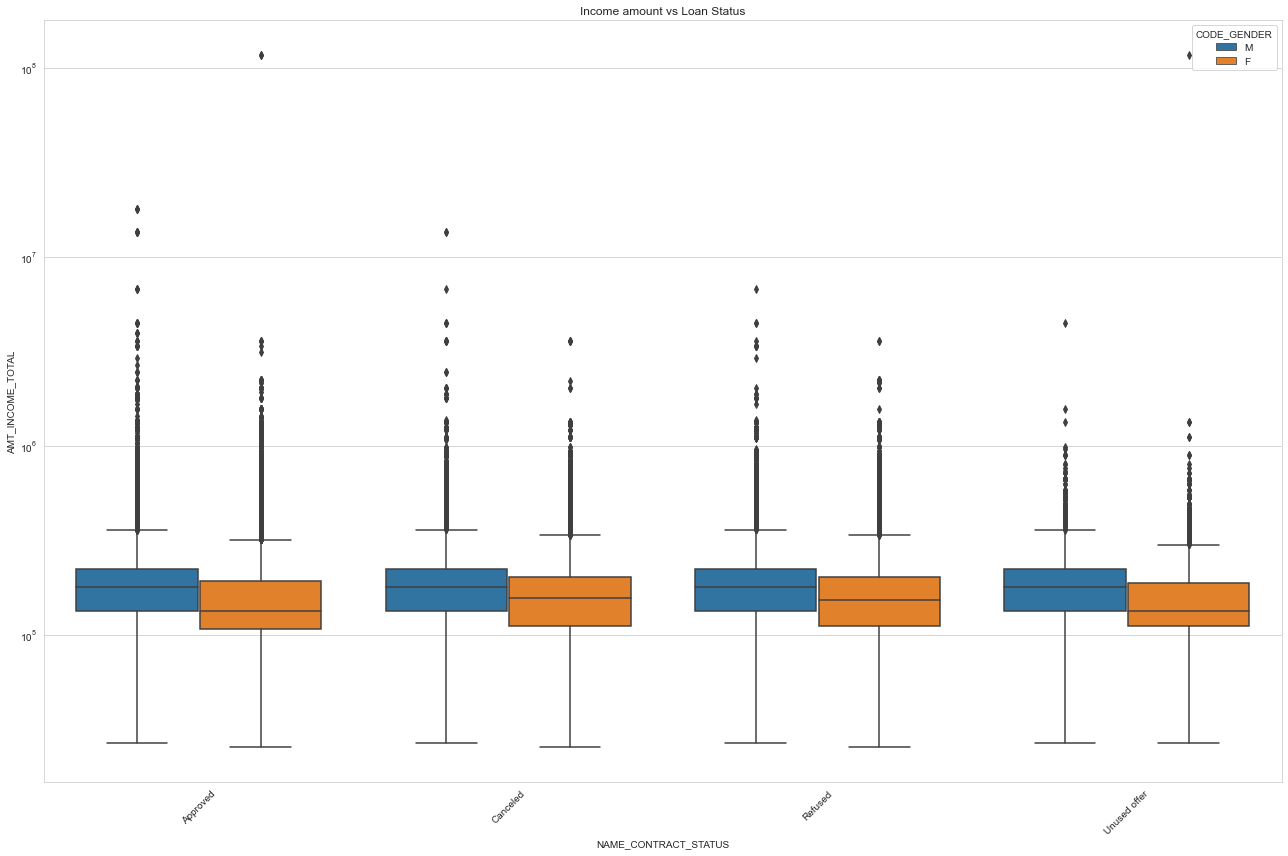

In [90]:
# Box plotting for Income amount

plt.figure(figsize=(18,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =final_df, y='AMT_INCOME_TOTAL',x='NAME_CONTRACT_STATUS', hue ='CODE_GENDER',orient='v')
plt.title('Income amount vs Loan Status')
plt.tight_layout()
plt.show()

`Insight :`
1. The loans that have been approved, cancelled, refused and unused have same median income amount for male customers.
2. The income of male customers is slightly higher than females in all the loan contract statuses.
3. The distribution of income amount is almost similar in all the loan contract statuses.
***

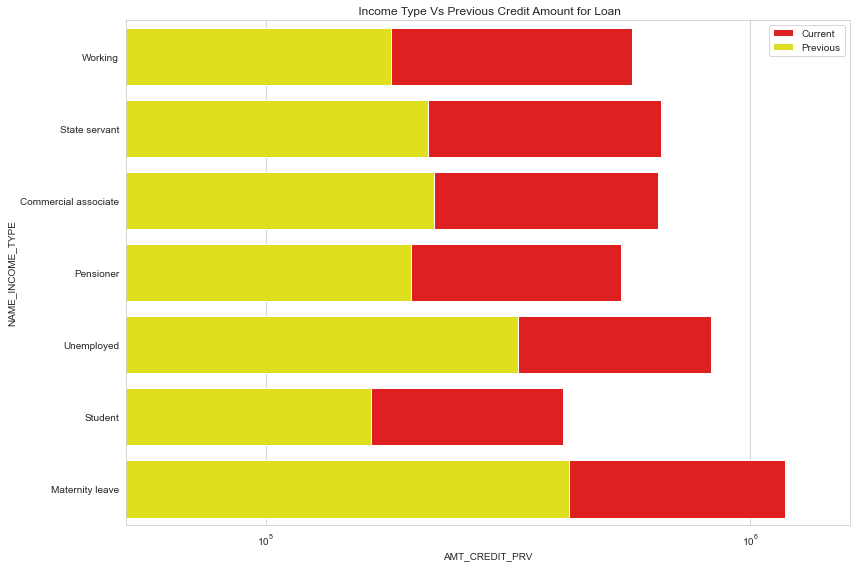

In [91]:
#plot a graph for income type to previous credited loan amount
plt.figure(figsize=(12,8))
plt.xscale('log')
plt.title(' Income Type Vs Previous Credit Amount for Loan')
sns.barplot(data=final_df, y=final_df.NAME_INCOME_TYPE, x=final_df.AMT_CREDIT_APP,color='Red',errwidth=0,label='Current')
sns.barplot(data=final_df, y=final_df.NAME_INCOME_TYPE, x=final_df.AMT_CREDIT_PRV,color='Yellow',errwidth=0,label='Previous')
plt.legend()
plt.tight_layout()


`Insight :`
1. The loan amount that is credited in the current application is higher than that in previous application for all the income type groups.
2. Highest loan amount is credited for people on maternity leave in both current and previous application.
***

In [92]:
#Creating a funtion to plot barplot
def bar_plot_graph(df, y_label, x_label, hue_value, title, orien, width, length, scale):
    plt.figure(figsize=(width,length))
    plt.xticks(rotation=90)
    if scale == 'xscale':
        plt.xscale('log')
    else:
        plt.yscale('log')
    sns.barplot(data =final_df, y=y_label, hue=hue_value, x=x_label, errwidth=0, orient= orien)
    plt.title(title)
    plt.tight_layout()
    plt.show()
print('Function created successfully')

Function created successfully


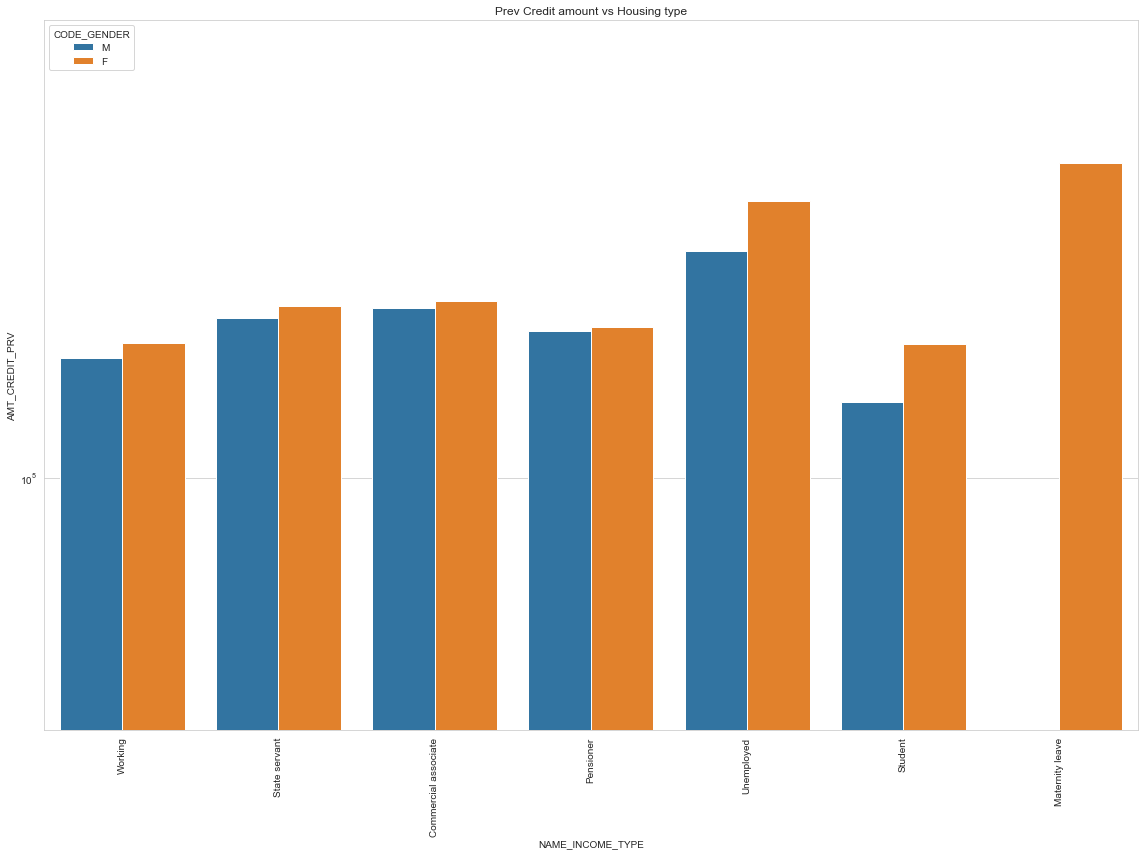

In [93]:
#use the above function to create a plot between previous credit amount and housing type
bar_plot_graph(final_df, 'AMT_CREDIT_PRV', 'NAME_INCOME_TYPE', 'CODE_GENDER', 'Prev Credit amount vs Housing type', 'v', 16, 12, 'yscale')

`Insight :`
1. Females across all the occupation type were given higher loan amount compared to males.
2. Unemployed females had highest loan amount in their previous loan application.
***

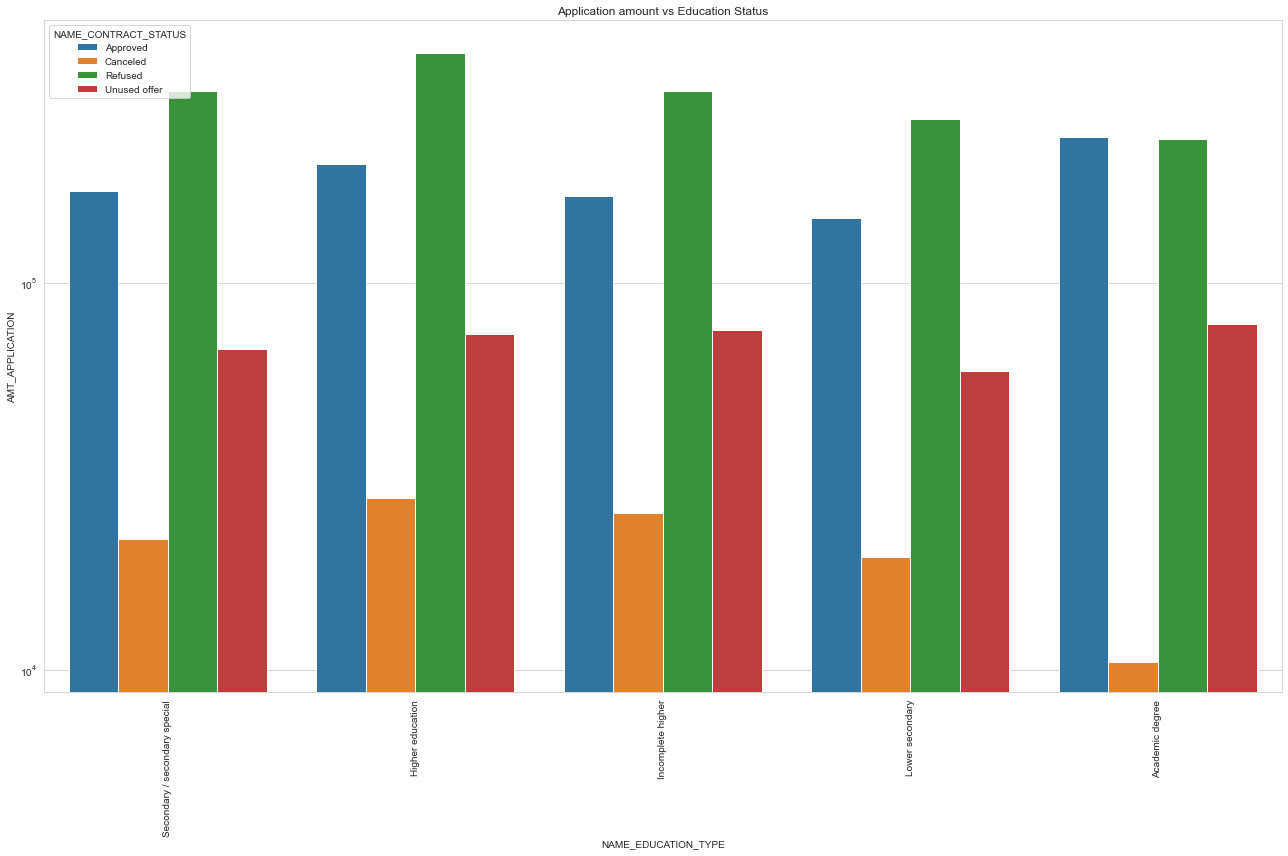

In [96]:
bar_plot_graph(final_df,'AMT_APPLICATION','NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS', 'Application amount vs Education Status', 'v', 18,12, 'yscale')

`Insight :`
1. For the customers with academic degree as educational qualification, the amount of loan asked by the customer that was accepted and rejectes is nearly same. Also, people in this category have cancelled loan with highest loan amounts.
2. Amount of loan offered by the bank and which were unused by customers are almost same across all education types.
***

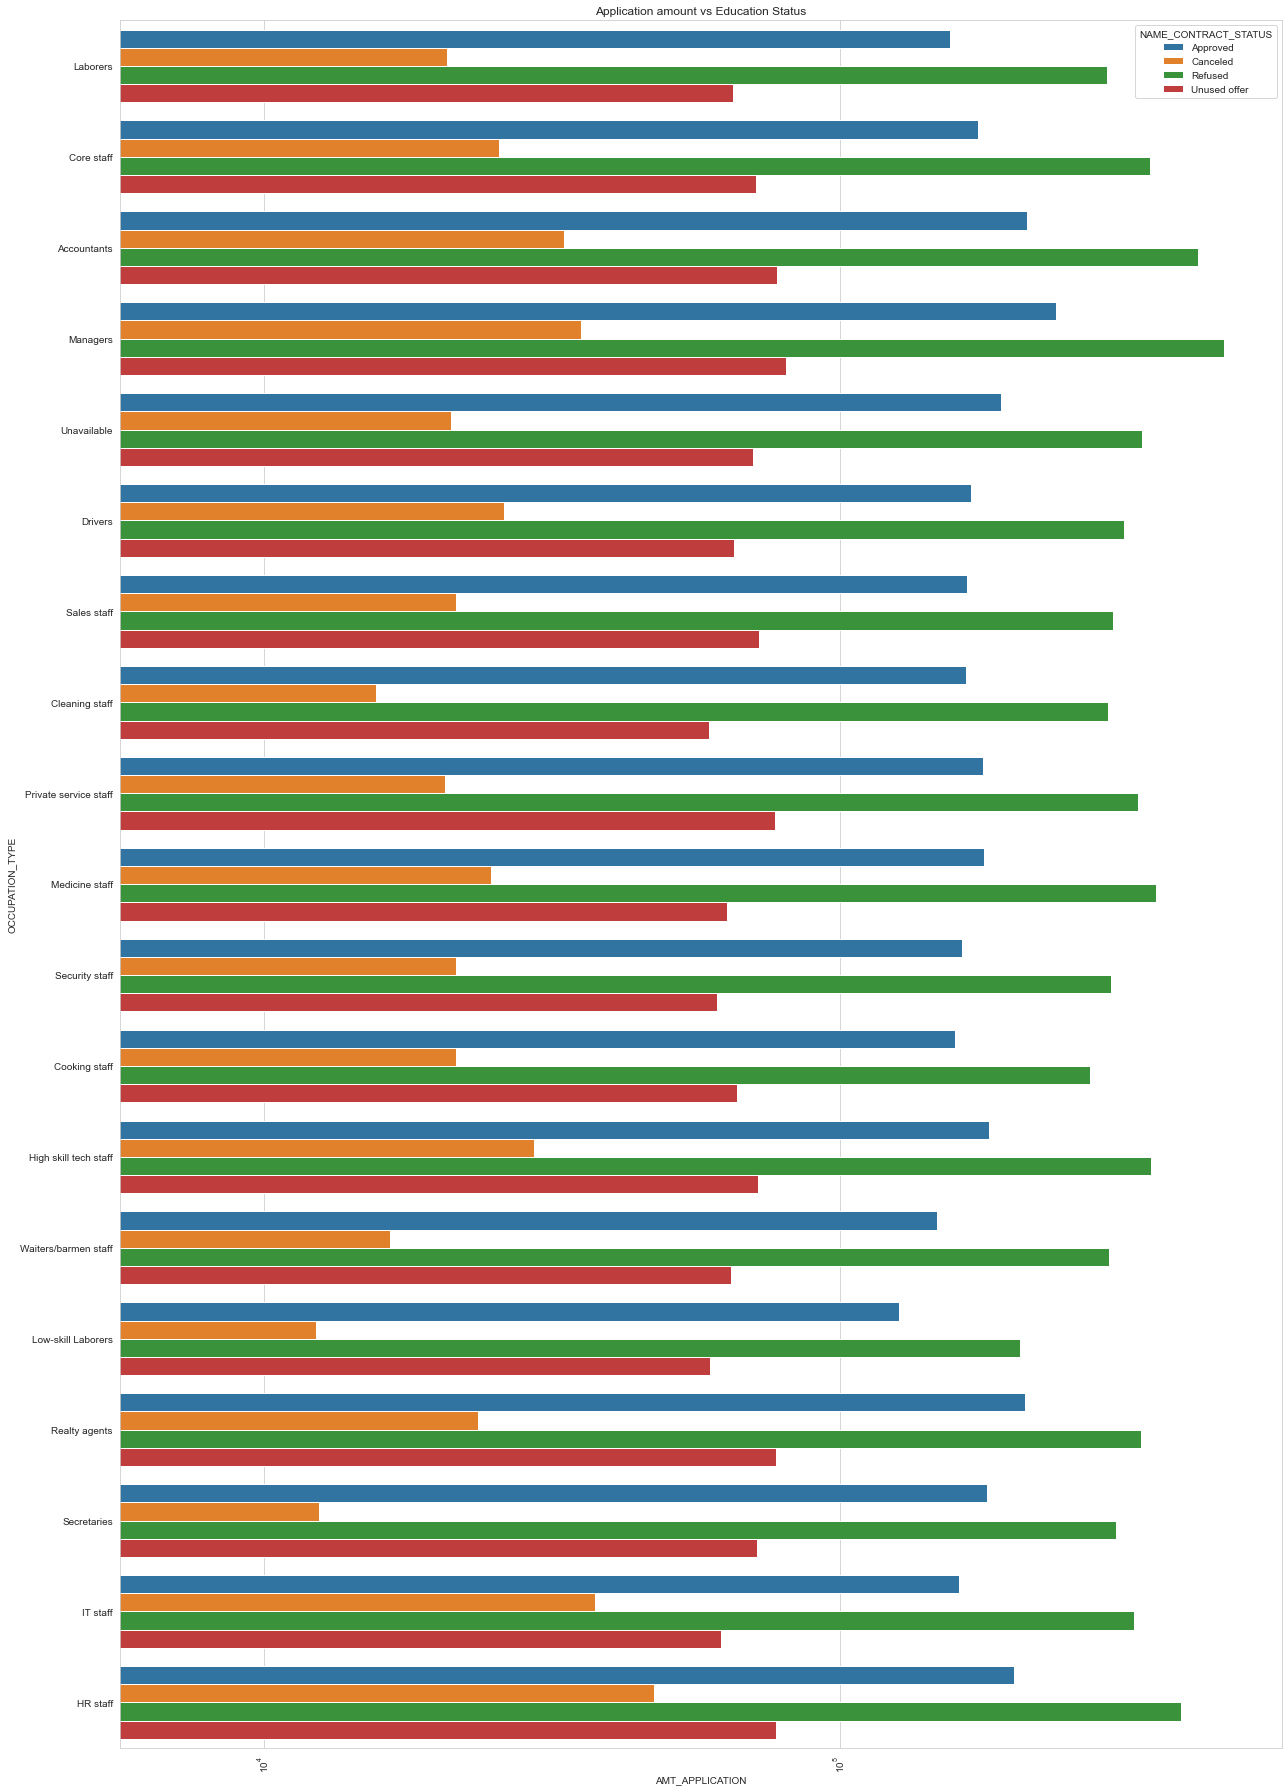

In [97]:
bar_plot_graph(final_df,'OCCUPATION_TYPE', 'AMT_APPLICATION', 'NAME_CONTRACT_STATUS', 'Application amount vs Education Status', 'h', 18,25, 'xscale')

`Insight :`
1. For the higher amount of loan asked by customers there is high chance of getting loan application refused, this is highest with customers on Managerial posts.
2. For the people with occupation type Accountants and Real estate agents the number of application that were accepted are high and highest for the customer on Managerial post.
***

In [98]:
#Let's create a correlation matrix on final dataset
corr_mat_final = final_df[['AMT_INCOME_TOTAL',
       'AMT_CREDIT_APP', 'AMT_ANNUITY_APP', 'AMT_GOODS_PRICE_APP','CNT_CHILDREN','CNT_FAM_MEMBERS','Age_Years','AMT_APPLICATION','AMT_ANNUITY_PRV',
        'AMT_CREDIT_PRV', 'AMT_GOODS_PRICE_PRV']].corr()
corr_mat_final

,AMT_INCOME_TOTAL,AMT_CREDIT_APP,AMT_ANNUITY_APP,AMT_GOODS_PRICE_APP,CNT_CHILDREN,Age_Years,AMT_APPLICATION,AMT_ANNUITY_PRV,AMT_CREDIT_PRV,AMT_GOODS_PRICE_PRV
AMT_INCOME_TOTAL,1.000000,0.166258,0.206290,0.167658,0.011668,-0.025668,0.071492,0.121576,0.070652,0.081967
AMT_CREDIT_APP,0.166258,1.000000,0.758438,0.986321,0.002809,0.047665,0.118813,0.152961,0.116750,0.137749
AMT_ANNUITY_APP,0.206290,0.758438,1.000000,0.762255,0.029334,-0.029013,0.112067,0.202537,0.107650,0.134162
AMT_GOODS_PRICE_APP,0.167658,0.986321,0.762255,1.000000,-0.000990,0.045940,0.120740,0.155060,0.117231,0.138945
CNT_CHILDREN,0.011668,0.002809,0.029334,-0.000990,1.000000,-0.362970,-0.034170,-0.039863,-0.034864,-0.051214
Age_Years,-0.025668,0.047665,-0.029013,0.045940,-0.362970,1.000000,0.079796,0.085755,0.078089,0.111681
AMT_APPLICATION,0.071492,0.118813,0.112067,0.120740,-0.034170,0.079796,1.000000,0.809973,0.975683,0.999871
AMT_ANNUITY_PRV,0.121576,0.152961,0.202537,0.155060,-0.039863,0.085755,0.809973,1.000000,0.817977,0.822205
AMT_CREDIT_PRV,0.070652,0.116750,0.107650,0.117231,-0.034864,0.078089,0.975683,0.817977,1.000000,0.993201
AMT_GOODS_PRICE_PRV,0.081967,0.137749,0.134162,0.138945,-0.051214,0.111681,0.999871,0.822205,0.993201,1.000000


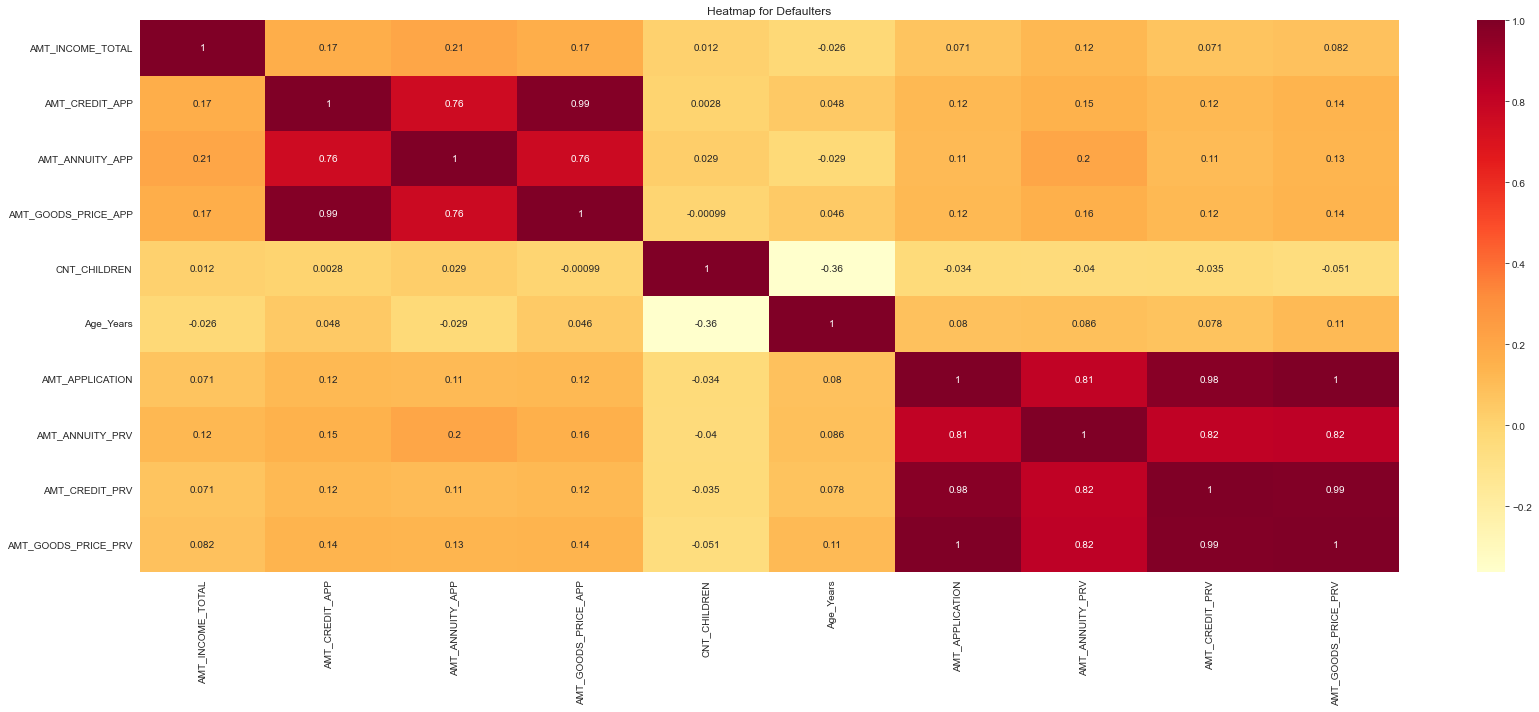

In [99]:
#Let's now plot the correlation matrix with heatmap
plt.figure(figsize=[24, 10])

sns.heatmap(annot= True, data=corr_mat_final, cmap='YlOrRd').set(title='Heatmap for Defaulters')
plt.tight_layout()
plt.show()

`Insight :`
1. From the above heatmap, it evident that there is strong correlation between the Goods Price and Loan Amount of current application that is credited. Also, there is strong correlation between the Loan Amount asked by applicant and Loan Amount credited in previous application.
2. On the other hand, There is weak correlation between the age and count of children and also between the Goods price for the loan, loan amount credited and loan anuity of current and previous application.
***